# Time Series Analysis and Forecasting of Coal Prices in South Africa

## Description of data of Coal Prices for South Africa from OECD Website

Attributes:

Coal.Australia - Coal Price of Australia ($/tonne)

Coal.SA - Coal Price of South Africa ($/tonne)

Crude Oil - $/Barrel

Natural Gas - $ / million BTUs

Gold - $ / ounce

Silver - $ / ounce

Copper - $ / Tonne

Iron Ore - $ / Dry Metric Tonne

Commodity Index: A commodity index is an investment vehicle that tracks the price and the return on investment of a basket of commodities. The value of these indexes fluctuates based on their underlying commodities

Similarly—> Metal index, Non Fuel index, and Crude oil index 

BCI: Business Confidence Index
This business confidence indicator provides information on future developments, based upon opinion surveys on developments in production, orders and stocks of finished goods in the industry sector. It can be used to monitor output growth and to anticipate turning points in economic activity. Numbers above 100 suggest an increased confidence in near future business performance, and numbers below 100 indicate pessimism towards future performance.

CCI: Consumer Confidence Index
This consumer confidence indicator provides an indication of future developments of households’ consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. An indicator above 100 signals a boost in the consumers’ confidence towards the future economic situation, as a consequence of which they are less prone to save, and more inclined to spend money on major purchases in the next 12 months. Values below 100 indicate a pessimistic attitude towards future developments in the economy, possibly resulting in a tendency to save more and consume less.

CLI: Composite Leading Indicator
The composite leading indicator (CLI) is designed to provide early signals of turning points in business cycles showing fluctuation of the economic activity around its long term potential level. CLIs show short-term economic movements in qualitative rather than quantitative terms



## Research Questions


    1) The trend shows the general tendency of the data to increase or decrease during a long period of time. Is there a significant trend? 

    2) Seasonality exists when a series exhibits regular fluctuations based on the season. Is there seasonality in our series?

    3) Cyclic behaviour occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years. Is there evidence of the presence of cycles in our data? 

    4) Outliers in time series data are values that significantly differ from the patterns and trends of the other values in the time series. Are there any outliers in the data that need to be explained by those with expert knowledge? 

    5) How strong are the relationships among the variables available for analysis?
    
    6) We would like to forecast future prices of Coal.SA, which model would be best in handling this prediction? How can we compare between these different models?



### Package Imports

In [ ]:
!pip install plot_keras_history
!pip install statsmodels==0.10.1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import datetime
import statsmodels.api as sm
from pylab import rcParams
from datetime import datetime
#from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

rcParams['figure.figsize'] = 18, 10

In [4]:
import tensorflow as tf
import random as python_random

def reset_seeds():
  python_random.seed(49)
  np.random.seed(49) 
  tf.random.set_seed(49)

reset_seeds() 

### If using Colab

In [5]:
# step 1- Mount your Google Drive to Collaboratory

# from google.colab import drive 
# drive.mount('/content/gdrive')
df=pd.read_csv('./coal-25082020.csv')
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df = df.sort_values(by='Date')
df = df.set_index('Date')
df.index=pd.to_datetime(df.index.strftime("%Y-%d-%m"))

In [6]:
df.head()

,Coal.Australia,Coal.SA,CrudeOil,Fuel.Index,NaturalGas,Coal.Producer.Index,Gold,Silver,Copper,IronOre,CrudeOil.Index,Metal.Index,NonFuel.Index,Commodity.Index,CLI,CCI,BCI
Date,,,,,,,,,,,,,,,,,
1992-01-01,39.5,31.0,17.38,23.71,1.28,93.6,354.45,4.11,2139.23,33.1,40.23,35.59,48.40,50.72,99.20515,99.36520,99.32731
1992-02-01,39.5,31.0,17.62,23.83,1.21,93.8,353.91,4.15,2205.97,33.1,41.09,37.12,48.71,50.72,99.22767,99.46713,99.51028
1992-03-01,39.5,31.0,17.45,23.79,1.28,93.6,344.34,4.11,2227.33,33.1,41.17,37.41,48.74,50.75,99.25694,99.62660,99.67402
1992-04-01,39.5,31.0,18.63,25.24,1.47,94.1,338.62,4.05,2215.33,33.1,44.09,38.00,48.45,51.17,99.26983,99.72688,99.74699
1992-05-01,39.5,31.0,19.50,26.33,1.59,94.7,337.24,4.07,2216.52,33.1,45.57,37.99,48.57,52.64,99.23967,99.75301,99.77460


### Data Cleaning

In [7]:
# Checking number of NaN values
nan_values_array = []
for column in df:
     nan_values_array.append(df[column].isnull().sum())
     
column_names = list(df.columns.values)
data = {'Feature':column_names,'Number of NaN values':nan_values_array}
nan_values = pd.DataFrame(data)
print(nan_values)

                Feature  Number of NaN values
0        Coal.Australia                     0
1               Coal.SA                     0
2              CrudeOil                     0
3            Fuel.Index                     1
4            NaturalGas                     0
5   Coal.Producer.Index                     0
6                  Gold                     1
7                Silver                     0
8                Copper                     0
9               IronOre                     1
10       CrudeOil.Index                     0
11          Metal.Index                     0
12        NonFuel.Index                     0
13      Commodity.Index                     0
14                  CLI                     1
15                  CCI                     0
16                  BCI                     0


The dataset containts few missing values. We utilized "Mean Imputation" method to deal with those missing values. We will fill the NaN values with the mean of the corresponding attributes.

In [8]:
# Imputing missing values with respective attirbute's mean value

df['Fuel.Index'].fillna(value=df['Fuel.Index'].mean(),inplace=True)
df['Gold'].fillna(value=df['Gold'].mean(),inplace=True)
df['IronOre'].fillna(value=df['IronOre'].mean(),inplace=True)
df['CLI'].fillna(value=df['CLI'].mean(),inplace=True)

if df.isnull().values.any() == False:
    print("There is no NaN values in the dataset.")
else:
    print("There is missing values in the dataset.")

There is no NaN values in the dataset.



First we will analyze the correlation between features by correlation matrix and we will visualize it with heatmap. We will compare both Spearman and Pearson correlation coefficients.

### Pearson Correlation Coefficient

It is a measure of linear correlation between two sets of data. It is the covariance of two variables, divided by the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1. 

In [9]:
#Default of this method is 'Pearson'
df.corr()

,Coal.Australia,Coal.SA,CrudeOil,Fuel.Index,NaturalGas,Coal.Producer.Index,Gold,Silver,Copper,IronOre,CrudeOil.Index,Metal.Index,NonFuel.Index,Commodity.Index,CLI,CCI,BCI
Coal.Australia,1.000000,0.987597,0.850179,0.851378,0.255521,0.810126,0.783050,0.810518,0.864974,0.852453,0.847381,0.854603,0.901460,0.887339,0.082951,-0.542247,0.177860
Coal.SA,0.987597,1.000000,0.871322,0.873123,0.290419,0.823938,0.801117,0.829874,0.874786,0.862946,0.870686,0.865686,0.910450,0.907782,0.091018,-0.539615,0.180988
CrudeOil,0.850179,0.871322,1.000000,0.995256,0.406549,0.796077,0.771491,0.861501,0.915172,0.904424,0.996619,0.909210,0.924016,0.987910,0.172163,-0.523912,0.200040
Fuel.Index,0.851378,0.873123,0.995256,1.000000,0.466557,0.774840,0.743783,0.838364,0.905553,0.902277,0.990689,0.908074,0.913937,0.982795,0.167970,-0.531671,0.194572
NaturalGas,0.255521,0.290419,0.406549,0.466557,1.000000,0.012193,-0.057628,0.062815,0.271090,0.358885,0.393989,0.387791,0.230196,0.362033,0.179731,-0.164417,0.146136
Coal.Producer.Index,0.810126,0.823938,0.796077,0.774840,0.012193,1.000000,0.967557,0.879425,0.854071,0.721125,0.819444,0.767045,0.866988,0.855626,0.010621,-0.492948,0.069715
Gold,0.783050,0.801117,0.771491,0.743783,-0.057628,0.967557,1.000000,0.917025,0.850084,0.735615,0.791567,0.764590,0.866443,0.836704,0.044130,-0.490846,0.075308
Silver,0.810518,0.829874,0.861501,0.838364,0.062815,0.879425,0.917025,1.000000,0.887863,0.833503,0.862686,0.836922,0.922447,0.905437,0.105823,-0.515595,0.153023
Copper,0.864974,0.874786,0.915172,0.905553,0.271090,0.854071,0.850084,0.887863,1.000000,0.886565,0.916779,0.980363,0.964621,0.950226,0.282215,-0.458691,0.274979
IronOre,0.852453,0.862946,0.904424,0.902277,0.358885,0.721125,0.735615,0.833503,0.886565,1.000000,0.889031,0.914708,0.916057,0.918652,0.166951,-0.583230,0.123521


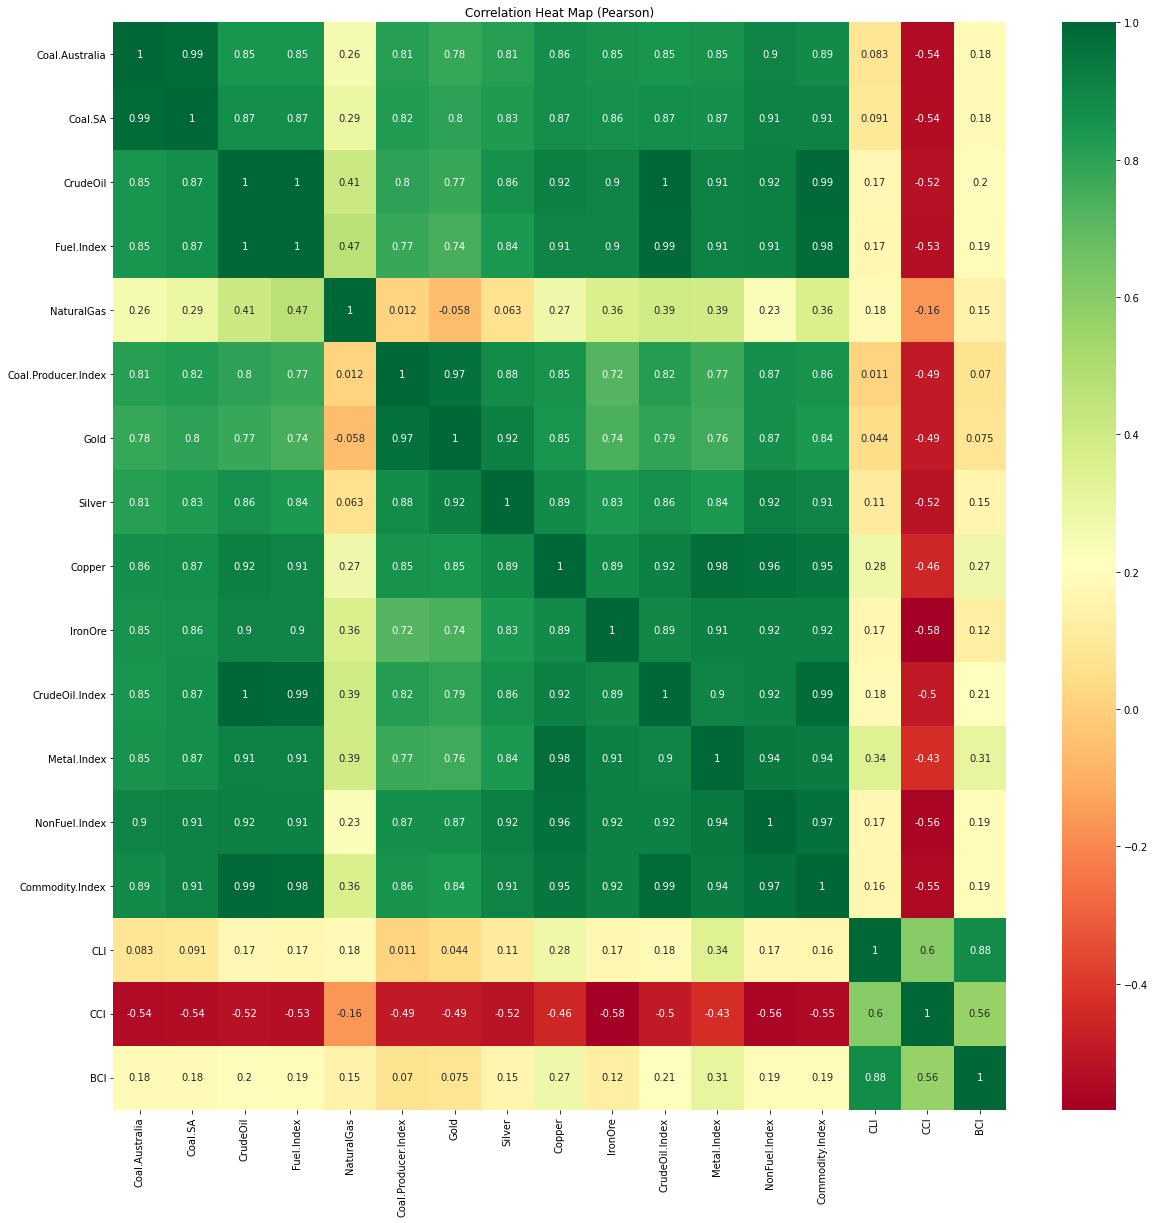

In [10]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn").set_title("Correlation Heat Map (Pearson)")

### Spearman Correlation Coefficient

It is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. 

In [11]:
df.corr(method='spearman')

,Coal.Australia,Coal.SA,CrudeOil,Fuel.Index,NaturalGas,Coal.Producer.Index,Gold,Silver,Copper,IronOre,CrudeOil.Index,Metal.Index,NonFuel.Index,Commodity.Index,CLI,CCI,BCI
Coal.Australia,1.000000,0.973604,0.825700,0.820585,0.292782,0.852715,0.867391,0.849249,0.908248,0.863539,0.824017,0.886046,0.917062,0.873373,0.197288,-0.477537,0.276444
Coal.SA,0.973604,1.000000,0.855360,0.850857,0.366861,0.858414,0.867964,0.857961,0.893044,0.865173,0.855584,0.885854,0.904266,0.905722,0.195795,-0.466701,0.286296
CrudeOil,0.825700,0.855360,1.000000,0.992517,0.585672,0.835841,0.783084,0.826411,0.879207,0.899158,0.997040,0.897172,0.851992,0.977501,0.255747,-0.480276,0.272766
Fuel.Index,0.820585,0.850857,0.992517,1.000000,0.623822,0.820430,0.767719,0.813453,0.872256,0.894594,0.987847,0.892057,0.846298,0.972673,0.253454,-0.484887,0.269419
NaturalGas,0.292782,0.366861,0.585672,0.623822,1.000000,0.233309,0.148604,0.258498,0.354649,0.461426,0.566852,0.449583,0.288322,0.541609,0.266691,-0.137696,0.271374
Coal.Producer.Index,0.852715,0.858414,0.835841,0.820430,0.233309,1.000000,0.931889,0.861441,0.834572,0.837785,0.844469,0.790692,0.852627,0.853923,0.093087,-0.540761,0.184543
Gold,0.867391,0.867964,0.783084,0.767719,0.148604,0.931889,1.000000,0.918048,0.873463,0.811249,0.783456,0.826023,0.899988,0.842226,0.138960,-0.528130,0.185918
Silver,0.849249,0.857961,0.826411,0.813453,0.258498,0.861441,0.918048,1.000000,0.872711,0.825872,0.826732,0.857810,0.911157,0.872452,0.275775,-0.411287,0.284948
Copper,0.908248,0.893044,0.879207,0.872256,0.354649,0.834572,0.873463,0.872711,1.000000,0.877198,0.869944,0.978305,0.958723,0.921424,0.336280,-0.465062,0.352826
IronOre,0.863539,0.865173,0.899158,0.894594,0.461426,0.837785,0.811249,0.825872,0.877198,1.000000,0.896075,0.888762,0.875642,0.903172,0.166245,-0.558628,0.168960


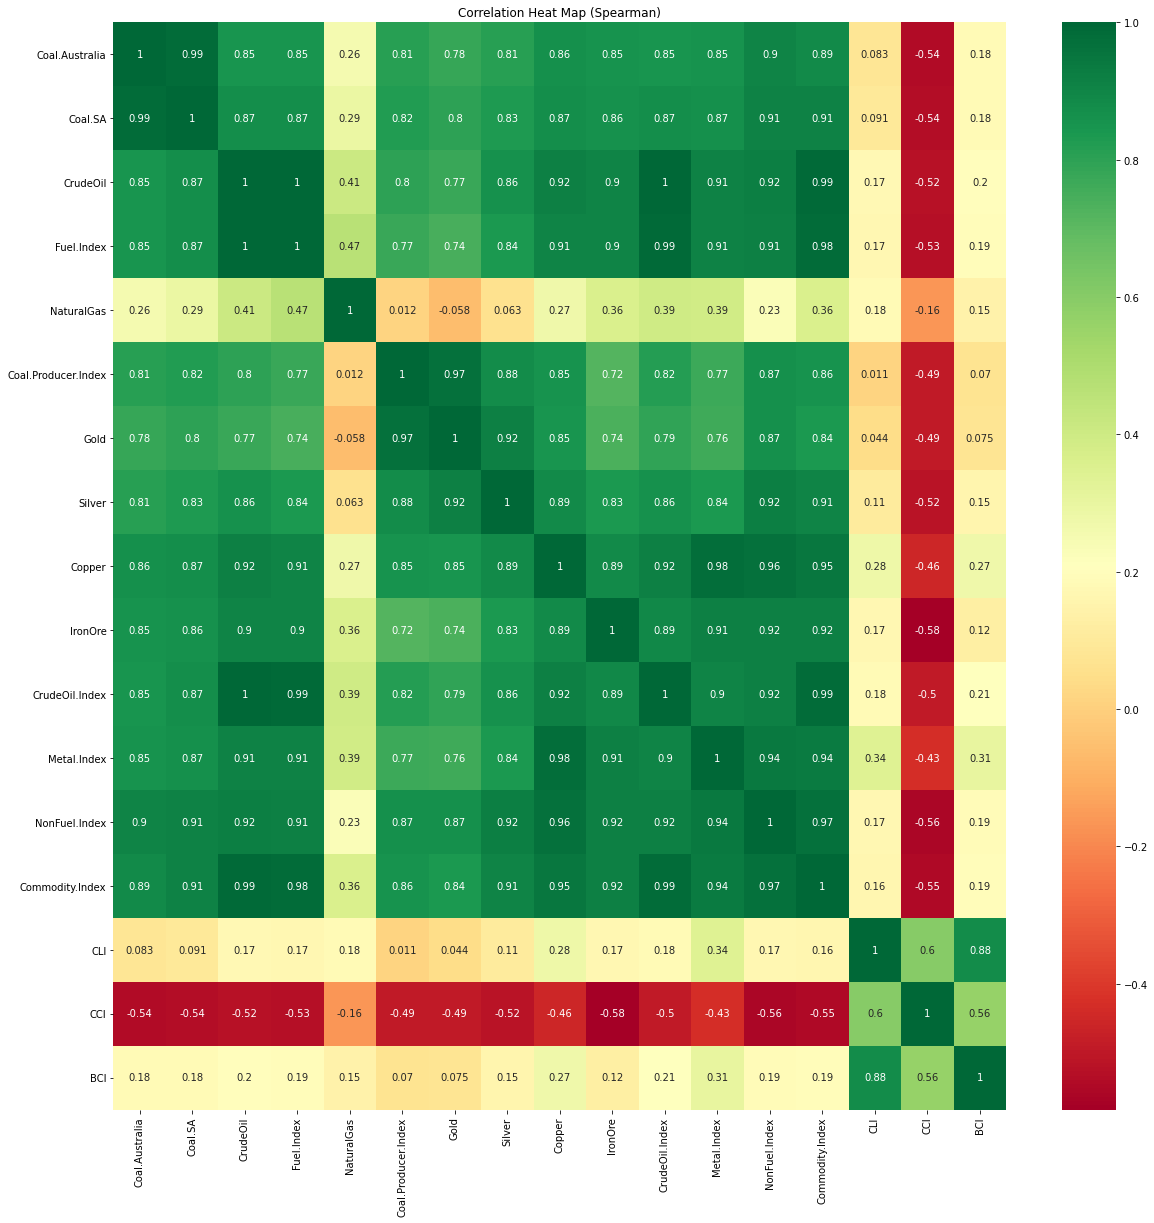

In [12]:
corrmat_spearman = df.corr(method='spearman')
top_corr_features = corrmat_spearman.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn").set_title("Correlation Heat Map (Spearman)")

As we can see, there is no big difference that needs to be considered between two different correlation coefficients. Therefore, we will continue with our feature selection step using Pearson Correlation Coefficient.

## Feature Selection

We will look at the features that have higher correlation than 0.5 with our target variable, Coal.SA.

In [13]:
# Correlation with output variable
cor_target = abs(corrmat["Coal.SA"])
# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

Coal.Australia         0.987597
Coal.SA                1.000000
CrudeOil               0.871322
Fuel.Index             0.873123
Coal.Producer.Index    0.823938
Gold                   0.801117
Silver                 0.829874
Copper                 0.874786
IronOre                0.862946
CrudeOil.Index         0.870686
Metal.Index            0.865686
NonFuel.Index          0.910450
Commodity.Index        0.907782
CCI                    0.539615
Name: Coal.SA, dtype: float64


Now, we will check the correlation between these variables. The reason is to find the unnecessary features and remove them from our dataset such that we prevent possible overfitting during model training.

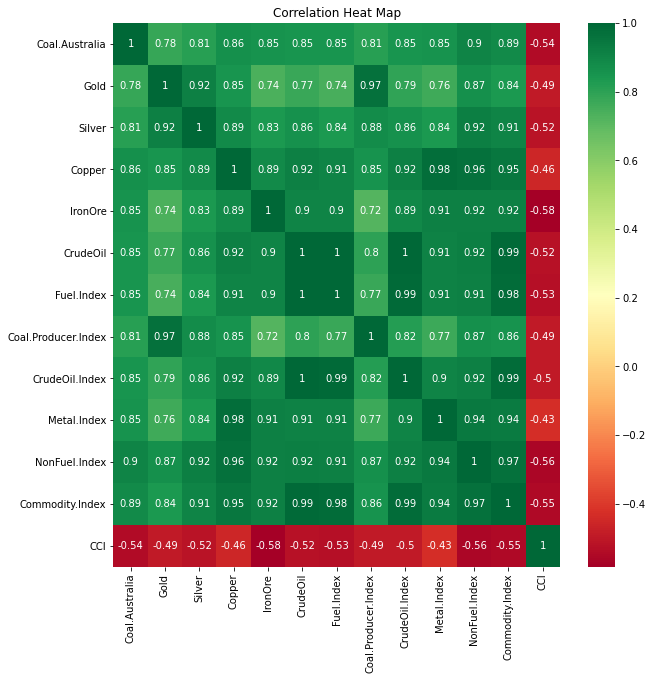

In [14]:
rf_df = df[['Coal.Australia', 'Gold','Silver','Copper','IronOre','CrudeOil','Fuel.Index','Coal.Producer.Index','CrudeOil.Index','Metal.Index','NonFuel.Index','Commodity.Index','CCI']]
fig, ax = plt.subplots(figsize=(10,10))
h=sns.heatmap(rf_df.corr(),annot=True,cmap="RdYlGn",ax=ax).set_title("Correlation Heat Map")

## Notes about correlation

From the above correlation matrix, we get the following results
    * Gold and Copper has high correlation
    * Gold and Coal.Producer.Index has high correlation
    * Silver and Gold has high Correlation
    * Silver and NonFuel.Index has high correlation also there is high correlation with Commodity.Index
    * Copper and CrudeOil,Fuel.Index,Metal.Index,NonFuel.Index,Commodity.Index and CrudeOil.Index has    high correlation
    * IronOre and Fuel.Index,CrudeOil,Metal.Index,NonFuel.Index,Commodity.Index has high correlation
    * CrudeOil and Metal.Index,NonFuel.Index,Commodity.Index has high correlation
    * CrudeOil.Index and Fuel.Index,NonFuel.Index,Metal.Index has high correlation
    * Metal.Index has high correlation with Fuel.Index,NonFuel.Index,Commodity.Index
    * NonFuel.Index has high correlation with Fuel.Index,Commodity.Index
    
 We will check these variables' correlation with our target variable and then drop the  attribute that has lowest correlation with our target. If two attribute has a high correlation between them, this means that they almost have linear relationship. So, we can think of them as a single variable basically. Therefore, we will see which one has the highest correlation with our target variable and remove the other one.

Text(0.5, 1.0, 'Metal.Index vs. Copper')

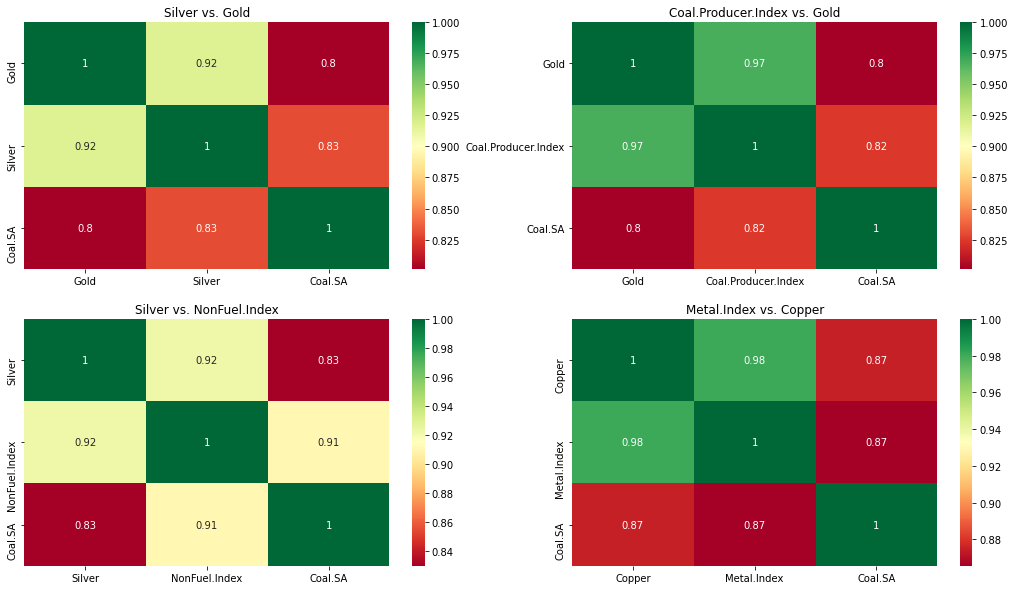

In [15]:
fig2,ax2 = plt.subplots(2,2)
sns.heatmap(df[['Gold','Silver','Coal.SA']].corr(),ax=ax2[0][0],annot=True,cmap="RdYlGn").set_title('Silver vs. Gold')
sns.heatmap(df[['Gold','Coal.Producer.Index','Coal.SA']].corr(),ax=ax2[0][1],annot=True,cmap="RdYlGn").set_title('Coal.Producer.Index vs. Gold')
sns.heatmap(df[['Silver','NonFuel.Index','Coal.SA']].corr(),ax=ax2[1][0],annot=True,cmap="RdYlGn").set_title('Silver vs. NonFuel.Index')
sns.heatmap(df[['Copper','Metal.Index','Coal.SA']].corr(),ax=ax2[1][1],annot=True,cmap="RdYlGn").set_title('Metal.Index vs. Copper')


We examined the attributes that has high correlation between them and observed their relationship with our target variable. After analysing the heatmaps above, we decided to drop "Gold, and Silver" attributes.

Text(0.5, 1.0, 'Fuel.Index vs. CrudeOil')

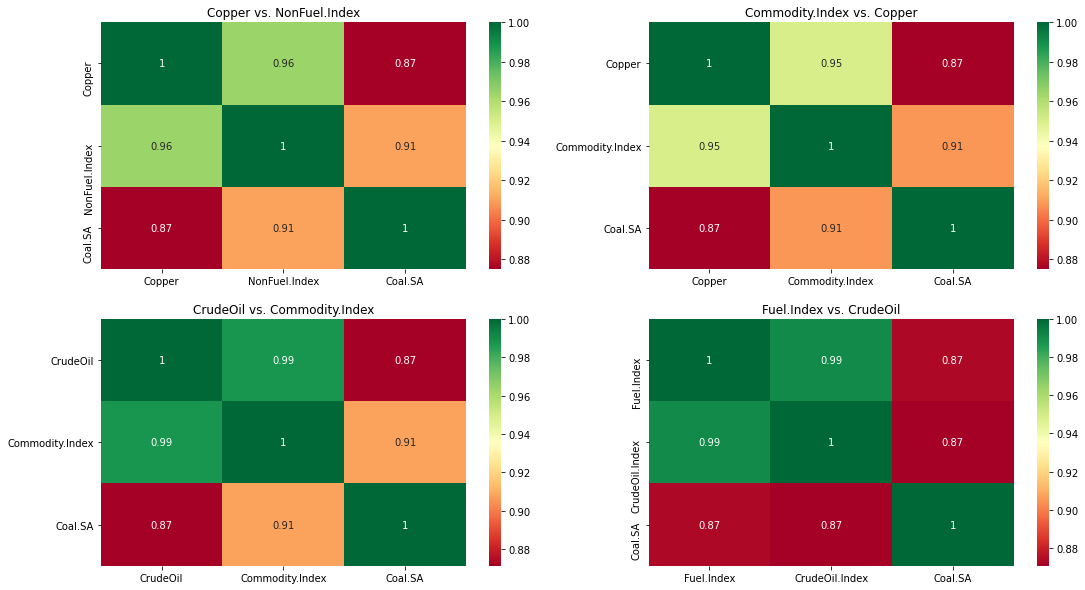

In [16]:
fig3,ax3 = plt.subplots(2,2)
sns.heatmap(df[['Copper','NonFuel.Index','Coal.SA']].corr(),ax=ax3[0][0],annot=True,cmap="RdYlGn").set_title('Copper vs. NonFuel.Index')
sns.heatmap(df[['Copper','Commodity.Index','Coal.SA']].corr(),ax=ax3[0][1],annot=True,cmap="RdYlGn").set_title('Commodity.Index vs. Copper')
sns.heatmap(df[['CrudeOil','Commodity.Index','Coal.SA']].corr(),ax=ax3[1][0],annot=True,cmap="RdYlGn").set_title('CrudeOil vs. Commodity.Index')
sns.heatmap(df[['Fuel.Index','CrudeOil.Index','Coal.SA']].corr(),ax=ax3[1][1],annot=True,cmap="RdYlGn").set_title('Fuel.Index vs. CrudeOil') 

Furthermore, we decide to take the attribute "Non-Fuel" and drop "Copper".

Text(0.5, 1.0, 'CrudeOil.Index vs. Commodity.Index')

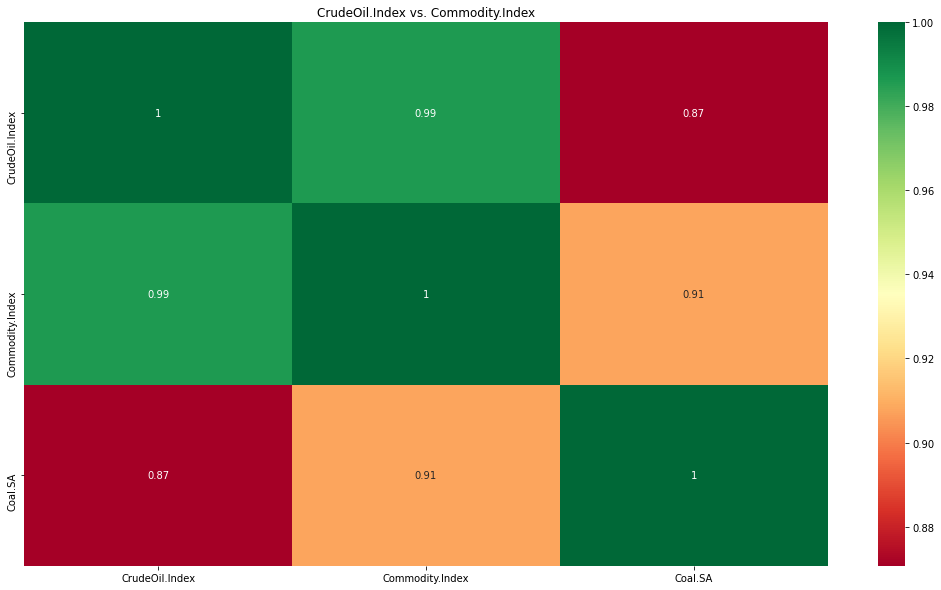

In [17]:
sns.heatmap(df[['CrudeOil.Index','Commodity.Index','Coal.SA']].corr(),annot=True,cmap="RdYlGn").set_title("CrudeOil.Index vs. Commodity.Index") 


We will take all the variables that has high correlation with our target "Coal.SA" and drop the others with the ones we decide to eliminate after analysing the heatmaps above.


In [18]:
df.drop(['Gold','Silver','Copper','CrudeOil','CLI','BCI','NaturalGas'], axis=1,inplace=True)
df.head()
df.shape

(343, 10)

In [19]:
df.columns

Index(['Coal.Australia', 'Coal.SA', 'Fuel.Index', 'Coal.Producer.Index',
       'IronOre', 'CrudeOil.Index', 'Metal.Index', 'NonFuel.Index',
       'Commodity.Index', 'CCI'],
      dtype='object')

## Exploratory Data Analysis

### Time Series Plot

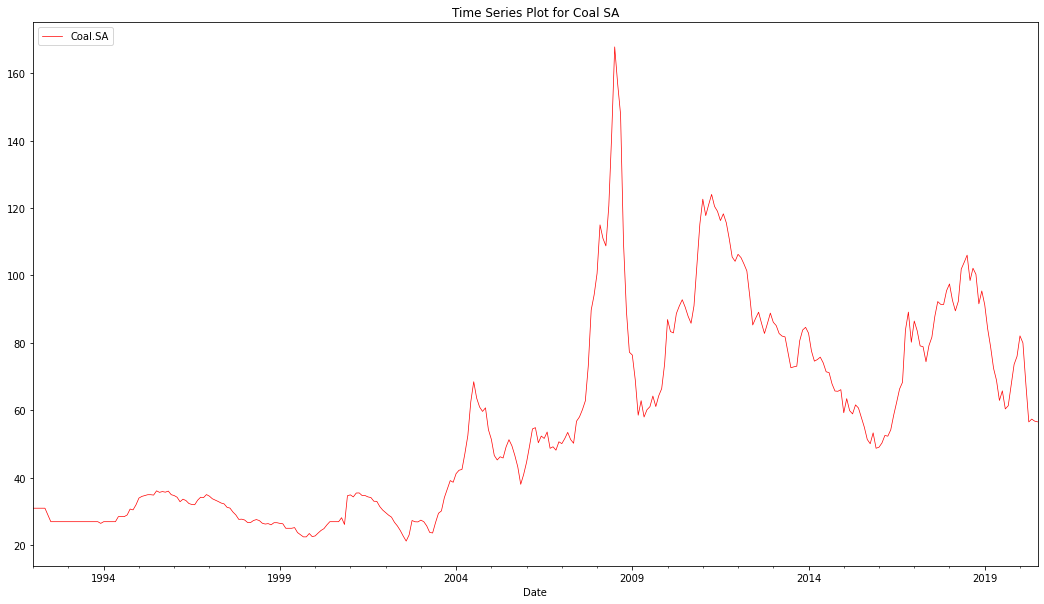

In [23]:
df["Coal.SA"].plot(linewidth=0.7, color='red')
plt.legend(df[["Coal.SA"]], loc ="upper left") 
plt.title("Time Series Plot for Coal SA")
plt.show()

Time series plot reveals that the coal prices have generally increased over time. There is a clear sign of trend. The variance seems to be low from 1992-2002 and is higher generally higher 2004 onwards. This indicates that in order to account for this increase in variance, we may need to take the log of the series. There are no cycles in the series. 
   

## Trend

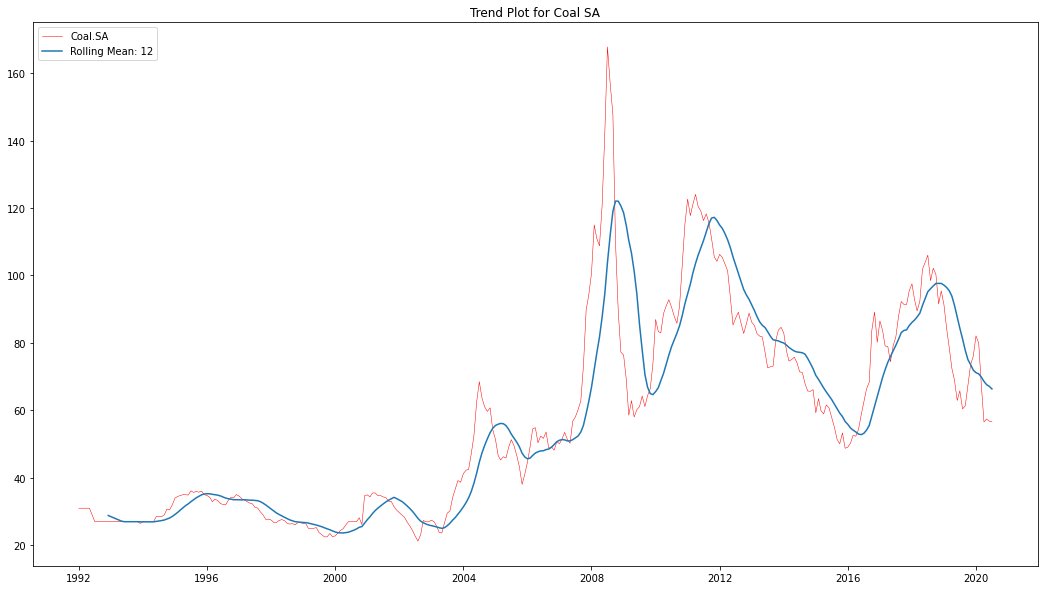

In [24]:
plt.plot(df.index, df["Coal.SA"], linewidth=0.5, color='red')
plt.plot(pd.Series.rolling(df["Coal.SA"], 12).mean())
plt.legend(["Coal.SA", "Rolling Mean: 12"], loc ="upper left") 
plt.title("Trend Plot for Coal SA")
plt.show()

The simple moving average is the unweighted mean of the previous M data points. Here M=12 to account for the annual effect.
We can see that: "Coal SA" series has a trend. The prices increases up until around 2008 and then the trend changes direction. Since there is trend, the time series is not stationary.

Because of the trend, we may say that the data is not stationary but such a hypothesis needs to be checked using the following methods: ACF plot of the data as well as the Adjusted Dickey Fuller Test.

## Seasonality

In [25]:
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month

<AxesSubplot:title={'center':'Seasonal plot of Coal SA'}, xlabel='Month', ylabel='Seasonal Plot for Coal SA Price'>

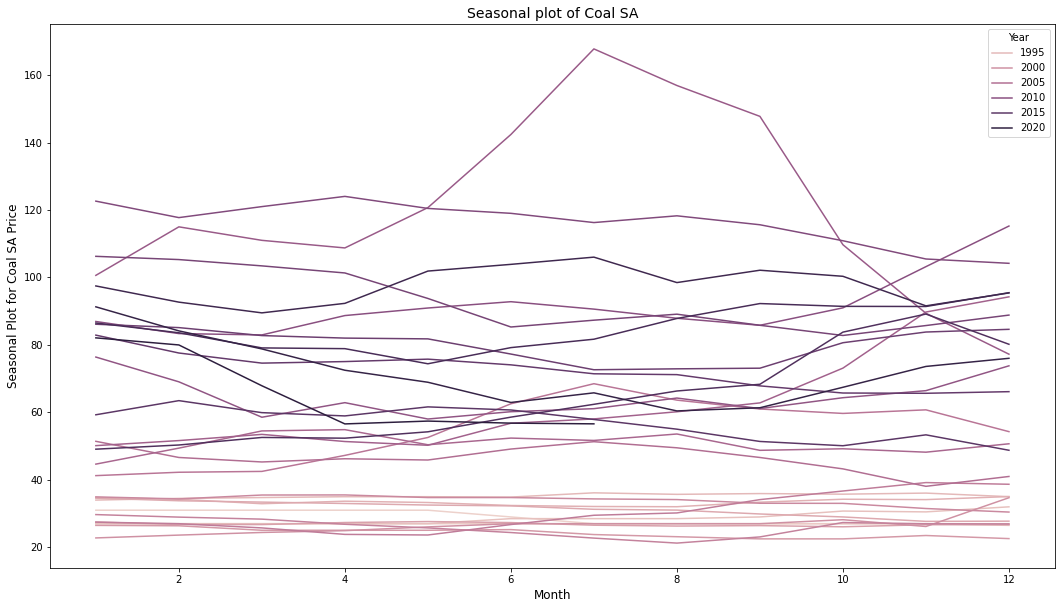

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Seasonal Plot for Coal SA Price', fontsize = 12)
ax.set_title('Seasonal plot of Coal SA', fontsize = 14, loc='center')
sns.lineplot(x=df['Month'], y=df["Coal.SA"], hue=df['Year'])

According to the the seasonal plot, it seems that there is no significant increase or decrease from one month to another over the years. However, the general picture reflects no "obvious" seasonality.

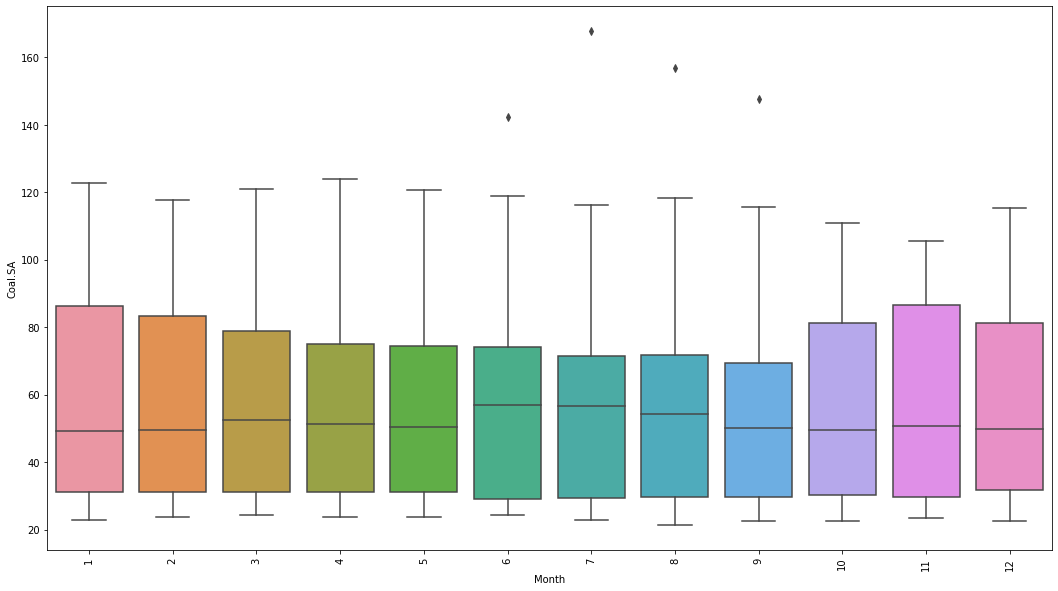

In [39]:
ax = sns.boxplot(data=df, x='Month', y='Coal.SA')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

As it can be seen from the seasonal boxplot, the overall level of all months are around the same, therefore we can again conclude there is no obvious seasonality. We also realize there are some outliers, looking back at the data for those levels, it indicates that the outliers are coming from the year 2008-2009.

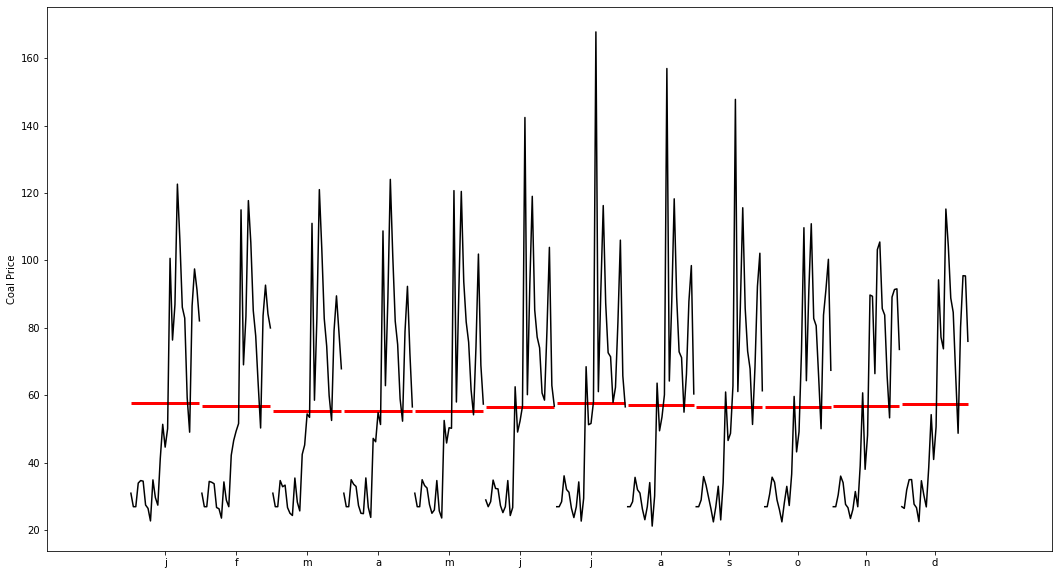

In [40]:
month_plot(df["Coal.SA"],ylabel='Coal Price');

As it can be seen from the seasonal subseries plot, the overall level of all months are around the same, therefore we can again conclude there is no obvious seasonality.

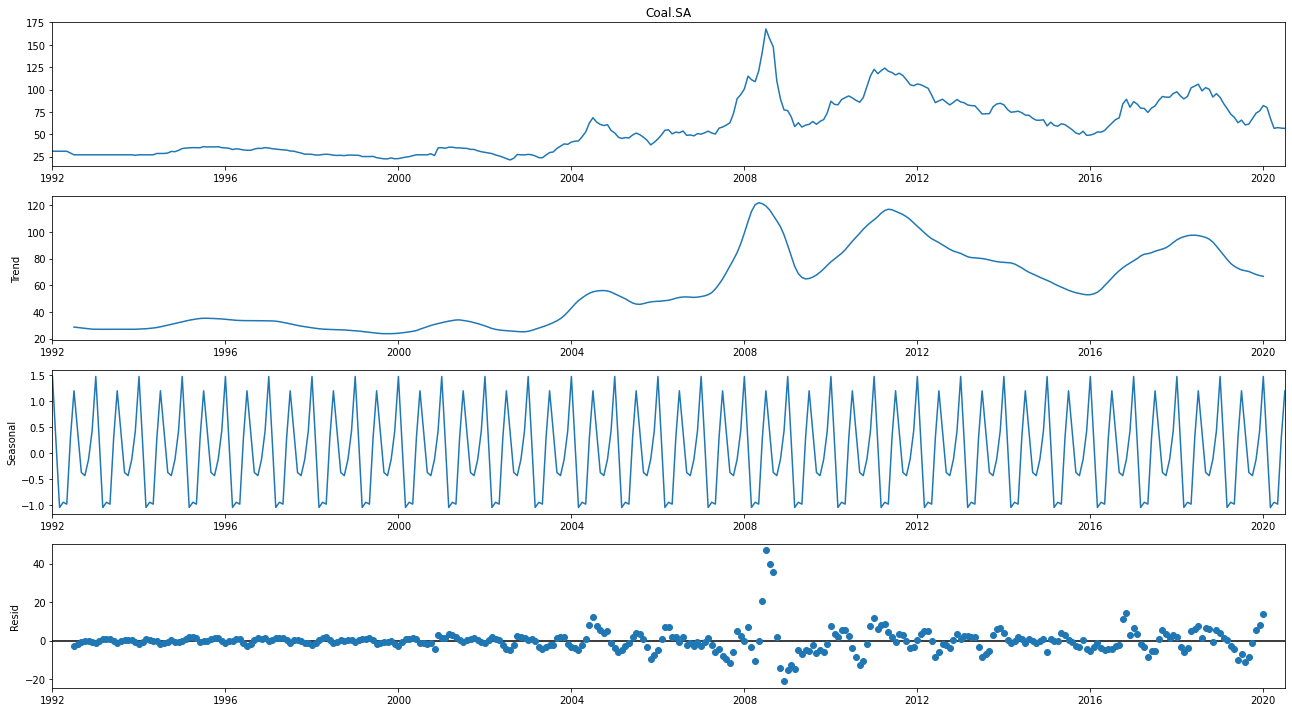

In [29]:
cls_decomposition = sm.tsa.seasonal_decompose(df["Coal.SA"], model='additive')
fig = cls_decomposition.plot()
plt.show()

From the classical decomposition, we can conclude that there appears to be no significant seasonality in the dataset since the seasonal component ranges from -1 to 1 (in the additive case does not have significant influence). We can see low impact of the seasonality by plotting the seasonally adjusted and the original data together.

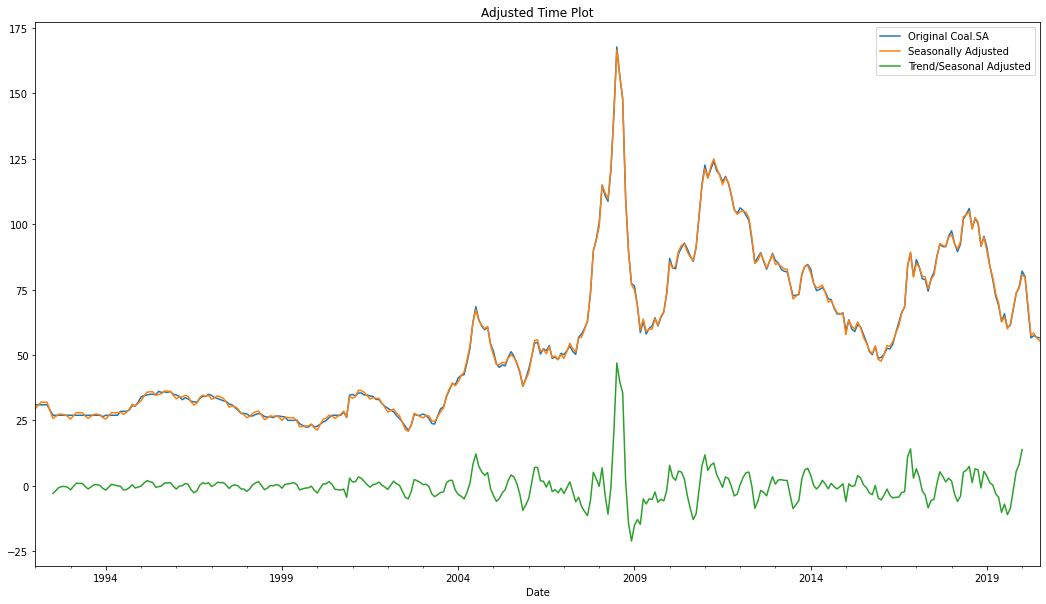

In [41]:
df["Coal.SA"].plot(label="Original Coal.SA")
df['Seasonally Adjusted'] = df['Coal.SA'] - cls_decomposition.seasonal
df["Seasonally Adjusted"].plot(label="Seasonally Adjusted")
df["Trend/Seasonal Adjusted"] = df["Coal.SA"] - cls_decomposition.seasonal- cls_decomposition.trend
df["Trend/Seasonal Adjusted"].plot(label="Trend/Seasonal Adjusted")
plt.legend();
plt.title("Adjusted Time Plot");

Here we can see that seasonality does not have a significant effect whereas the trend does.

## Handling Outliers


For every attribute we will check if there are outliers by using box plots. We will examine the data both from years and months perspective. Since we do not have large dataset, we will replace the outliers with the mean of the corresponding attribute.

### Checking Outliers (Month Perspective)


Text(0.5, 1.0, 'Coal.Producer.Index')

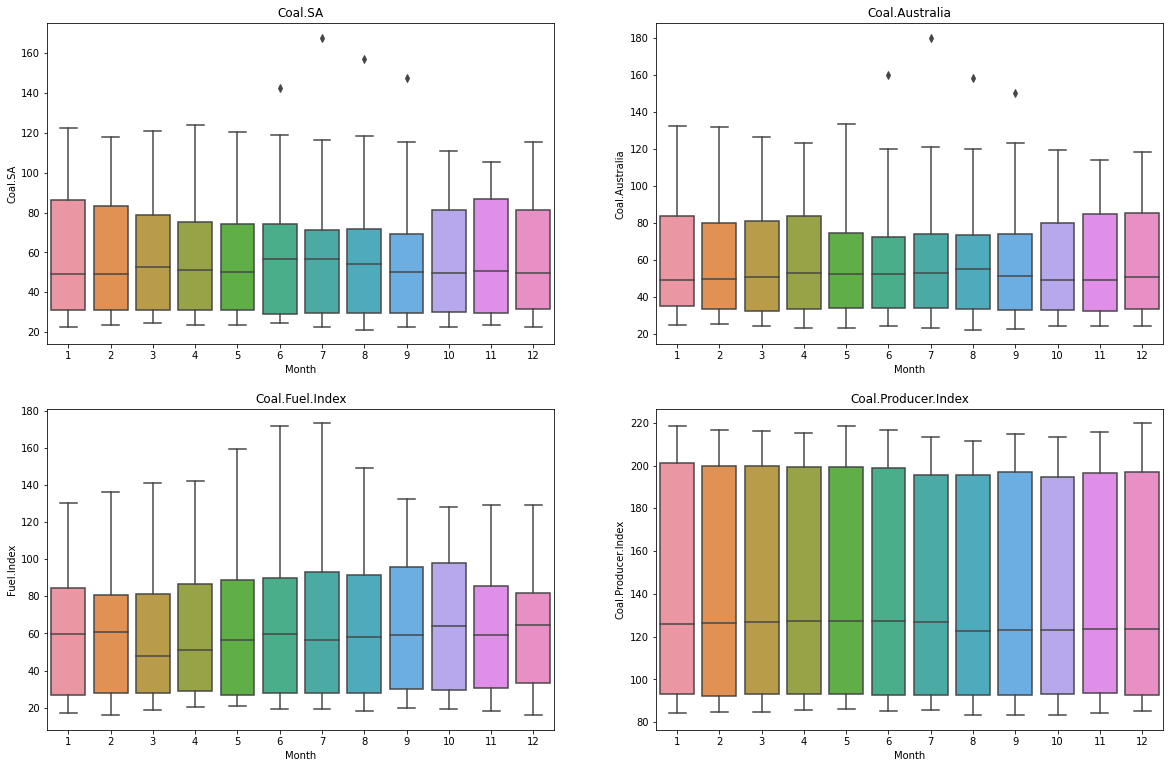

In [42]:
fig3,ax3 = plt.subplots(2,2,figsize=(20,13))
sns.boxplot(data=df, x='Month', y='Coal.SA',ax=ax3[0][0]).set_title("Coal.SA")
sns.boxplot(data=df, x='Month', y='Coal.Australia',ax=ax3[0][1]).set_title("Coal.Australia")
sns.boxplot(data=df, x='Month', y='Fuel.Index',ax=ax3[1][0]).set_title("Coal.Fuel.Index")
sns.boxplot(data=df, x='Month', y='Coal.Producer.Index',ax=ax3[1][1]).set_title("Coal.Producer.Index")

As we can see from the box-plots above we have outliers in our attributes Coal.SA and Coal.Australia.

Text(0.5, 1.0, 'Commodity.Index')

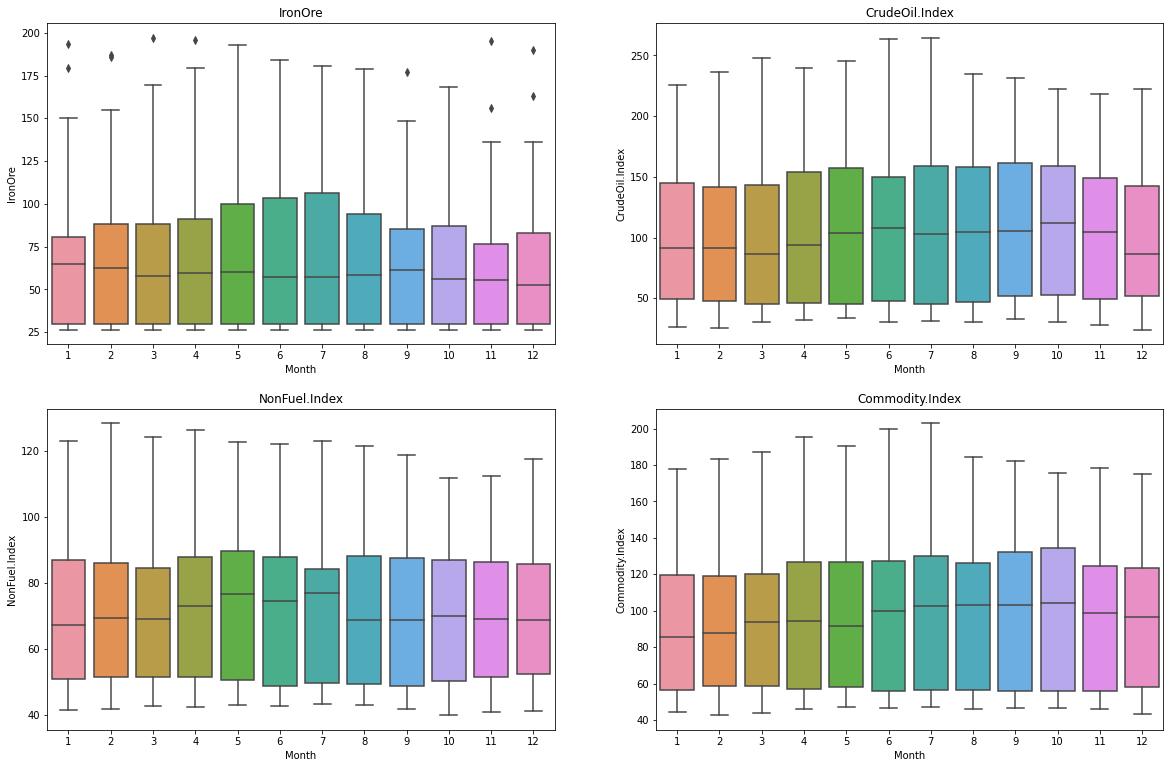

In [43]:
fig3,ax3 = plt.subplots(2,2,figsize=(20,13))
sns.boxplot(data=df, x='Month', y='IronOre',ax=ax3[0][0]).set_title("IronOre")
sns.boxplot(data=df, x='Month', y='CrudeOil.Index',ax=ax3[0][1]).set_title("CrudeOil.Index")
sns.boxplot(data=df, x='Month', y='NonFuel.Index',ax=ax3[1][0]).set_title("NonFuel.Index")
sns.boxplot(data=df, x='Month', y='Commodity.Index',ax=ax3[1][1]).set_title("Commodity.Index")

We can see that we have outliers in our attribute IronOre.

Text(0.5, 1.0, 'Metal.Index')

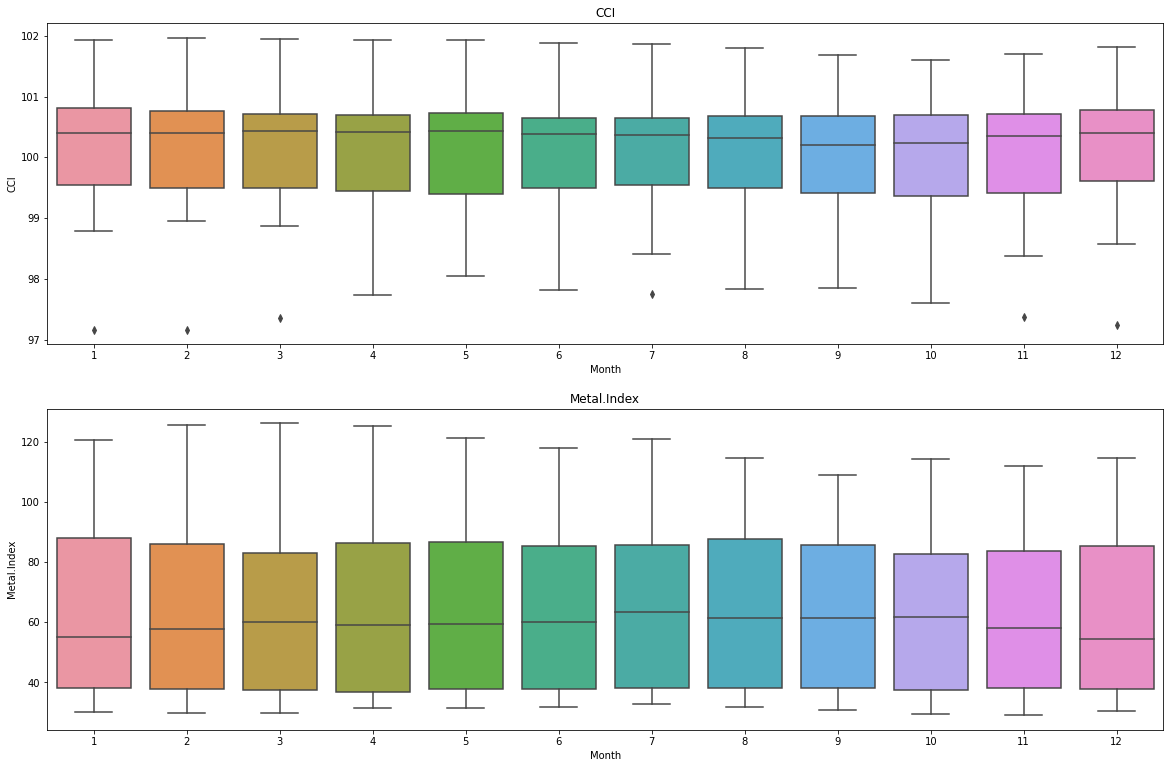

In [30]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Month',ax=ax3[0],y='CCI').set_title("CCI")
sns.boxplot(data=df, x='Month',ax=ax3[1],y='Metal.Index').set_title("Metal.Index")

Our attribute CCI also contains outliers.

### Replace the Outliers
As we can see from month perspective, the dataset contains outliers in some of the attributes. We will detect those outliers using IQR score, and if they are below the lower whisker, we will assign lower_whisker + 1 to those values, and if they are above the upper whisker we will assign upper_whisker - 1. 

In [44]:
def calculate_whiskers(attribute,time,perspective):
    Q1=df.loc[df[perspective] == time, attribute].quantile(0.25)
    Q3=df.loc[df[perspective] == time, attribute].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    return Upper_Whisker,Lower_Whisker

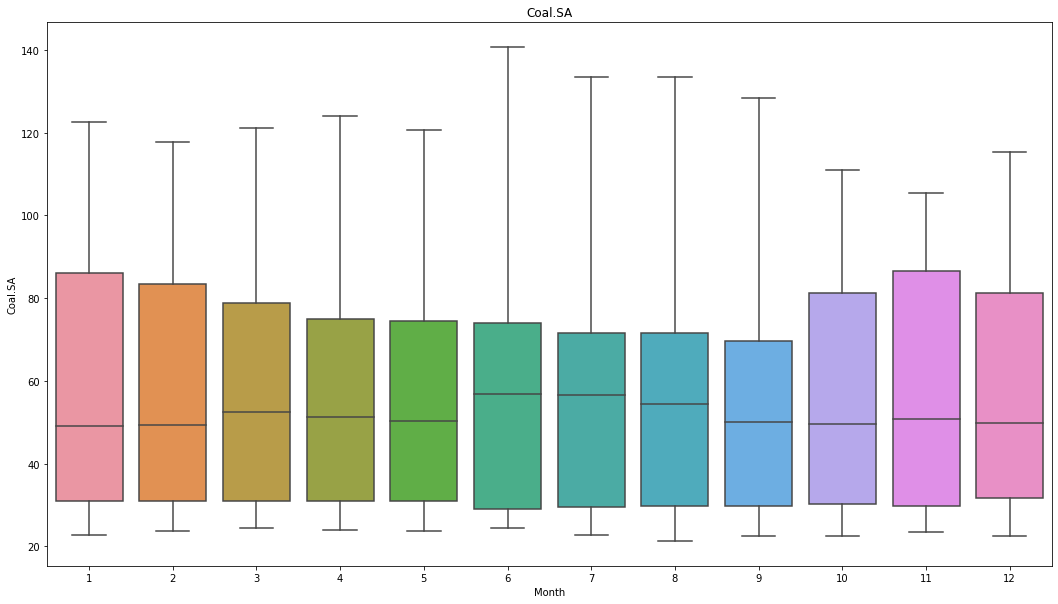

In [45]:
#For the target value "Coal.SA"
df.sort_values(by=['Coal.SA'],inplace=True)
months = [6,7,8,9]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.SA",month,"Month")
            if(df['Coal.SA'][ind] > Upper_Whisker):
                df.replace(df['Coal.SA'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.SA'][ind] < Lower_Whisker):
                df.replace(df['Coal.SA'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue      
ax = sns.boxplot(data=df, x='Month', y='Coal.SA').set_title("Coal.SA")

We successfully removed our attribute Coal.SA from the outliers!

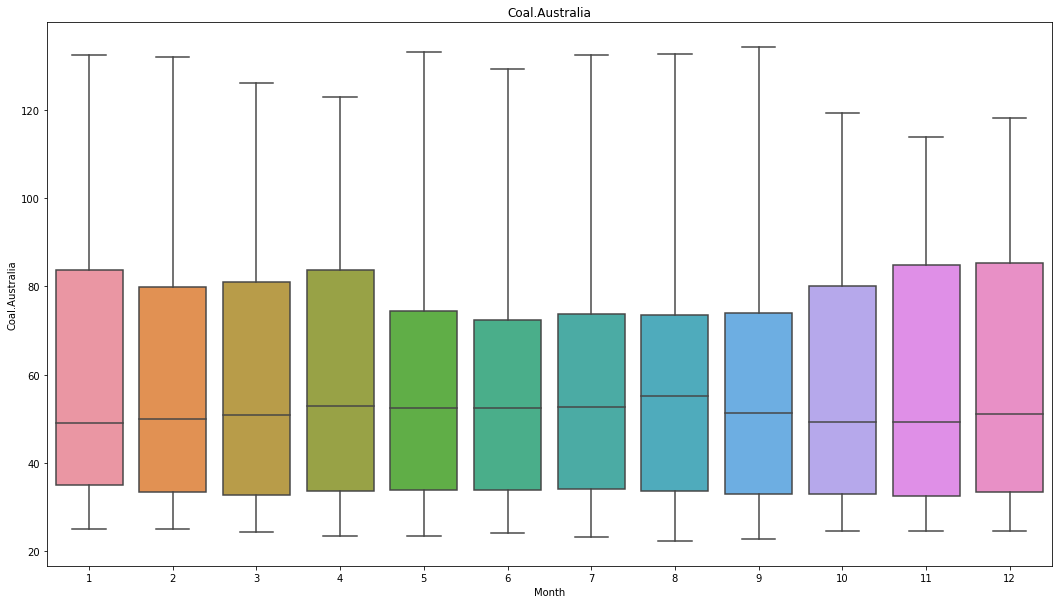

In [46]:
df.sort_values(by=['Coal.Australia'],inplace=True)

months = [6,7,8,9]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.Australia",month,"Month")
            if(df['Coal.Australia'][ind] > Upper_Whisker):
                df.replace(df['Coal.Australia'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.Australia'][ind] < Lower_Whisker):
                df.replace(df['Coal.Australia'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue  
                
ax = sns.boxplot(data=df, x='Month', y='Coal.Australia').set_title("Coal.Australia")

We successfully removed our attribute Coal.Australia from the outliers!

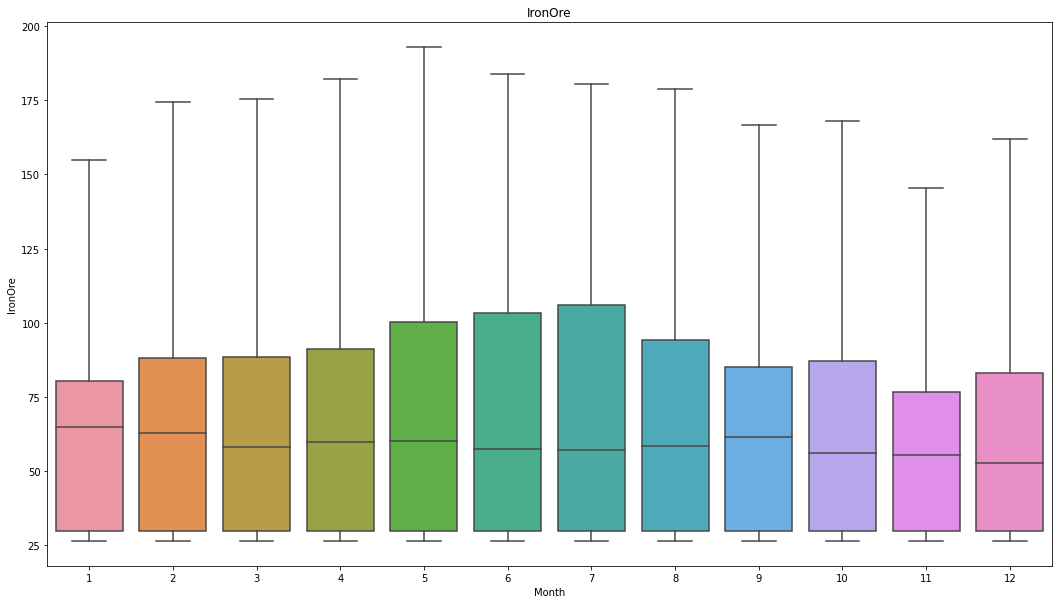

In [47]:
df.sort_values(by=['IronOre'],inplace=True)
months = [1,2,3,4,9,11,12]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("IronOre",month,"Month")
            if(df['IronOre'][ind] > Upper_Whisker):
                df.replace(df['IronOre'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['IronOre'][ind] < Lower_Whisker):
                df.replace(df['IronOre'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue  

ax = sns.boxplot(data=df, x='Month', y='IronOre').set_title("IronOre")

We successfully removed our attribute IronOre from the outliers!

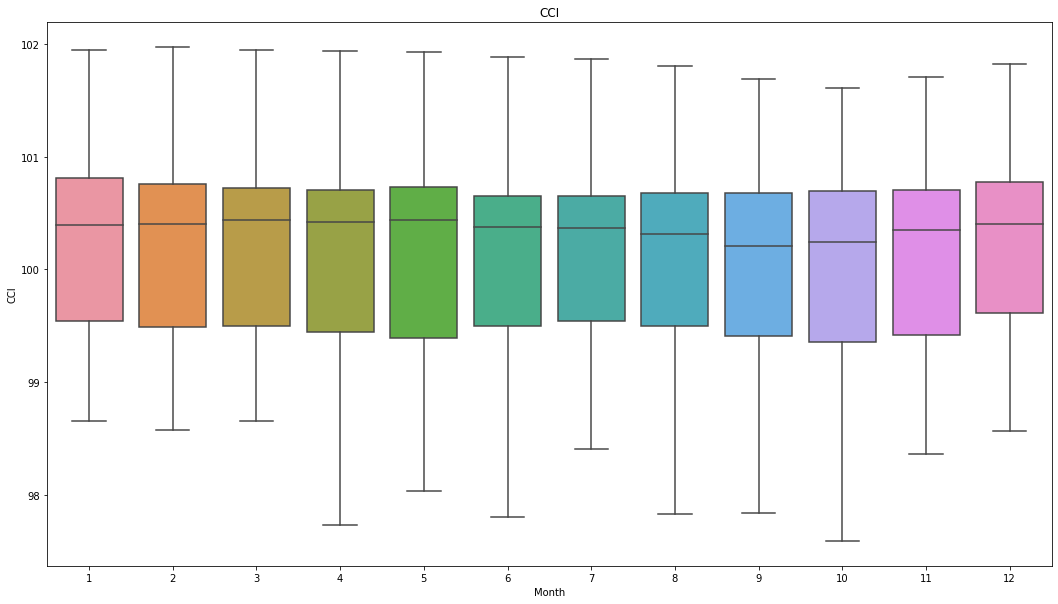

In [48]:
df.sort_values(by=['CCI'],inplace=True)

months = [1,2,3,7,11,12]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("CCI",month,"Month")
            if(df['CCI'][ind] > Upper_Whisker):
                df.replace(df['CCI'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['CCI'][ind] < Lower_Whisker):
                df.replace(df['CCI'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue  

ax = sns.boxplot(data=df, x='Month', y='CCI').set_title("CCI")            

As we can see, we removed the outliers.Our data looks outlier free!

In [49]:
df.shape

(343, 14)

## Checking Outliers (Year Perspective) 
Now we will look at the outliers from year perspective.

Text(0.5, 1.0, 'Coal.Australia')

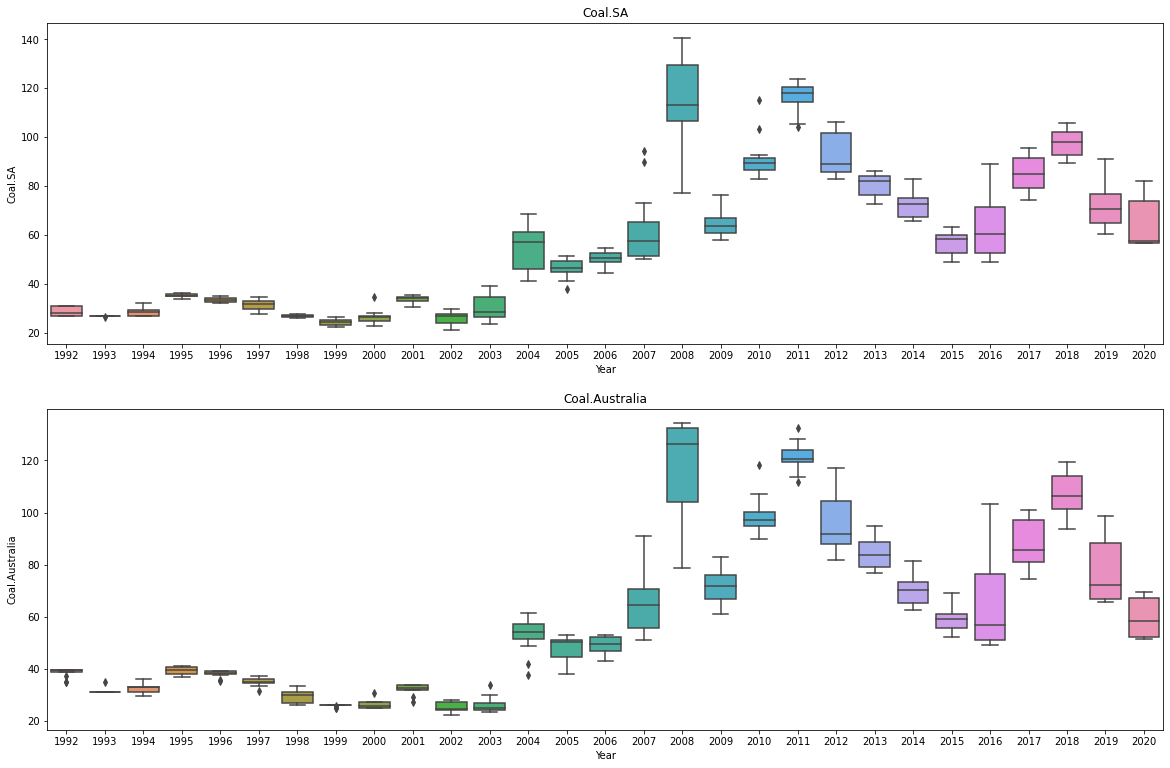

In [50]:
fig3,ax3 = plt.subplots(2, figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Coal.SA',ax=ax3[0]).set_title("Coal.SA")
sns.boxplot(data=df, x='Year', y='Coal.Australia',ax=ax3[1]).set_title("Coal.Australia")

Text(0.5, 1.0, 'Coal.Producer.Index')

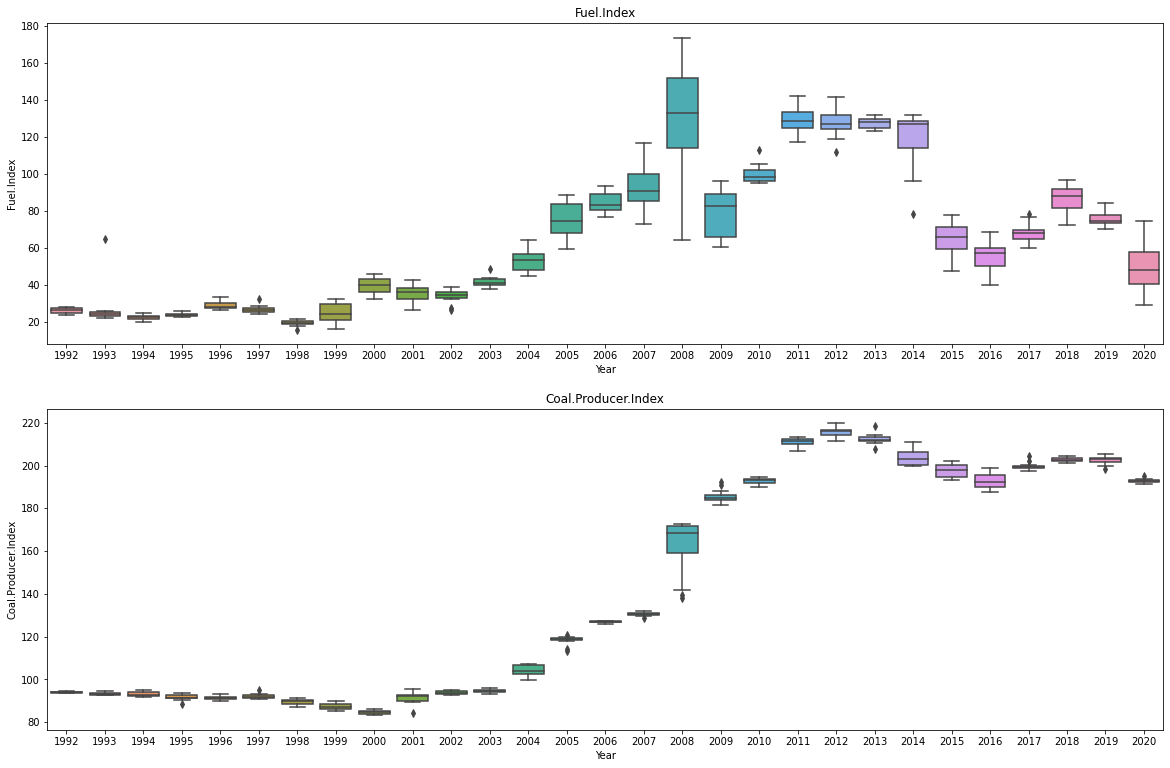

In [51]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Fuel.Index',ax=ax3[0]).set_title("Fuel.Index")
sns.boxplot(data=df, x='Year', y='Coal.Producer.Index',ax=ax3[1]).set_title("Coal.Producer.Index")

Text(0.5, 1.0, 'CrudeOil.Index')

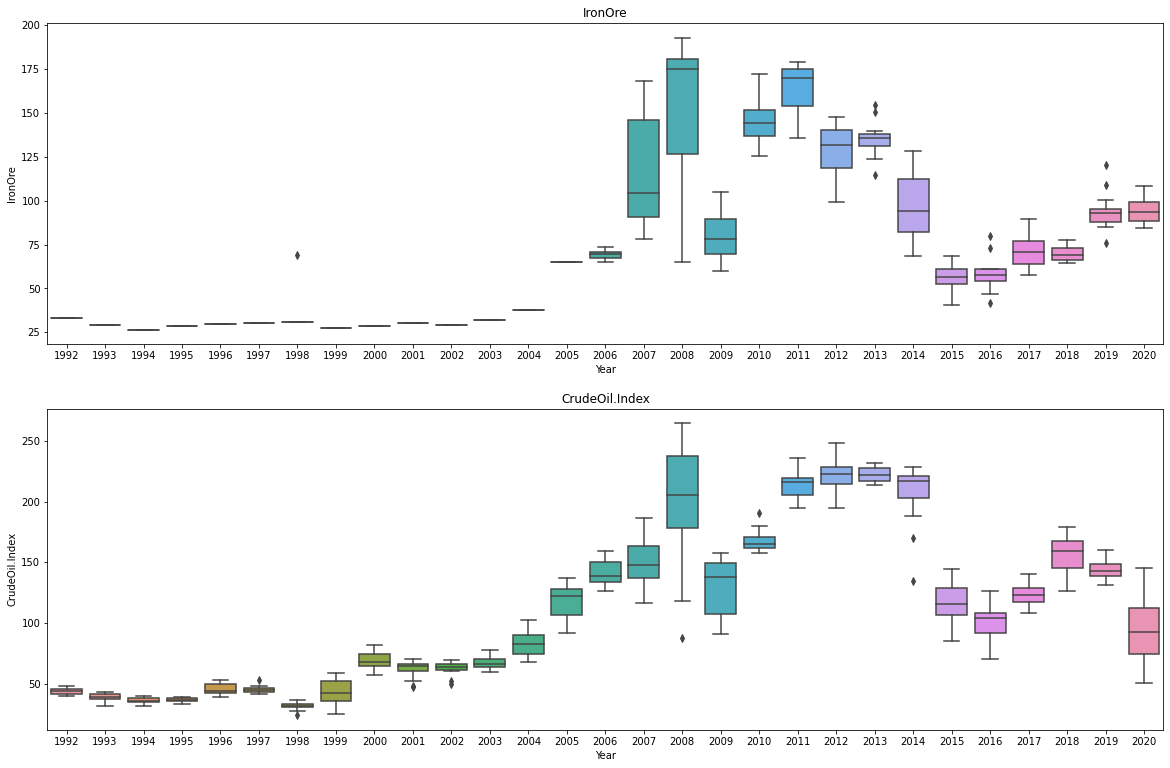

In [52]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='IronOre',ax=ax3[0]).set_title("IronOre")
sns.boxplot(data=df, x='Year', y='CrudeOil.Index',ax=ax3[1]).set_title("CrudeOil.Index")

Text(0.5, 1.0, 'Commodity.Index')

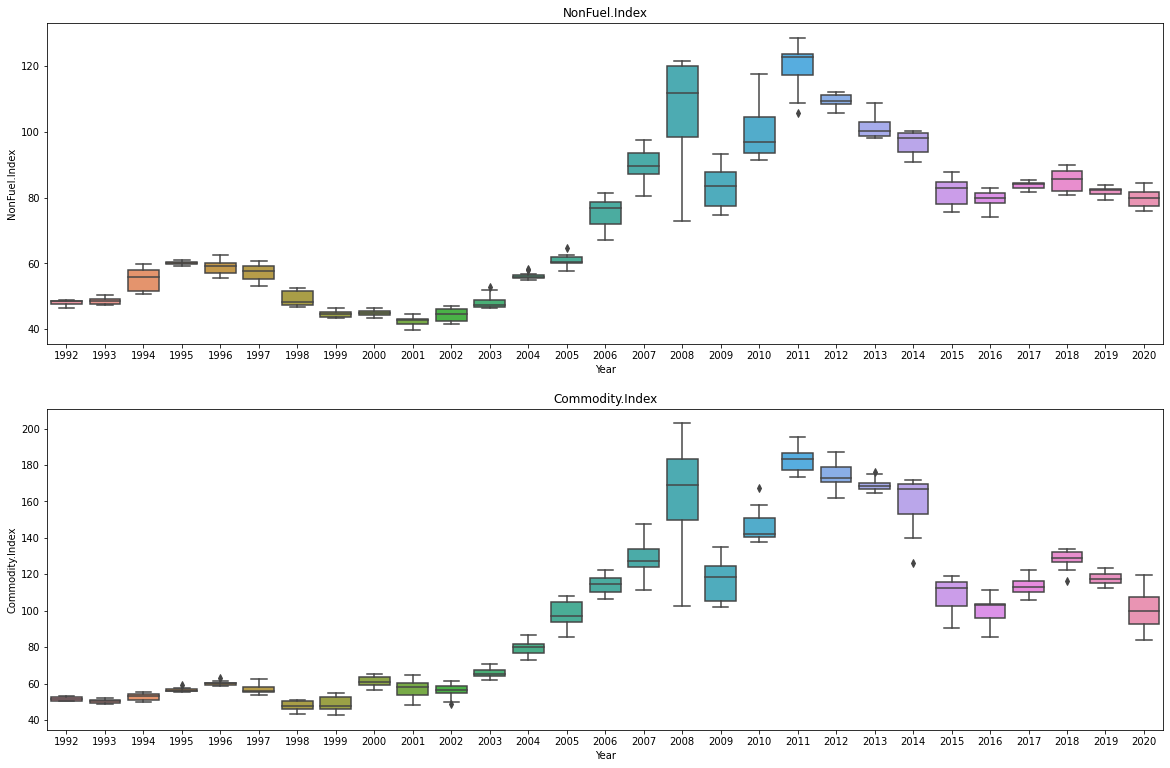

In [53]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='NonFuel.Index',ax=ax3[0]).set_title("NonFuel.Index")
sns.boxplot(data=df, x='Year', y='Commodity.Index',ax=ax3[1]).set_title("Commodity.Index")

Text(0.5, 1.0, 'Metal.Index')

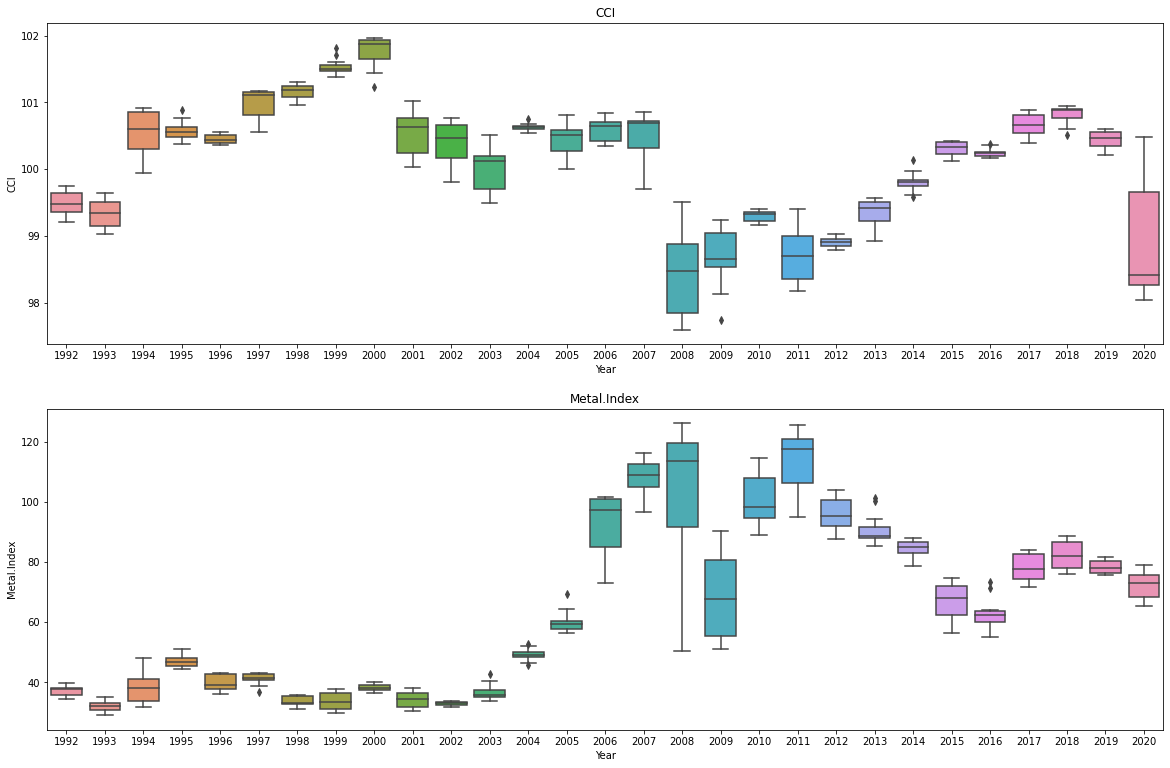

In [54]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year',ax=ax3[0],y='CCI').set_title("CCI")
sns.boxplot(data=df, x='Year',ax=ax3[1],y='Metal.Index').set_title("Metal.Index")

As we observed based on year perspective, the dataset contains have outliers in most of the attributes. 

### Replacing the Outliers
Following the previous approach, we will detect outliers using IQR score. And if they are below the lower whisker, we will assign lower_whisker + 1 to those values, and if they are above the upper whisker we will assign upper_whisker - 1. 

In [55]:
#for Coal.SA
years = [1993,2000,2007,2010,2005,2011]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.SA",year,"Year")
            if(df['Coal.SA'][ind] > Upper_Whisker):
                df.replace(df['Coal.SA'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.SA'][ind] < Lower_Whisker):
                df.replace(df['Coal.SA'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

In [56]:
#For Coal.Aus
years = [1993,1992,1997,1999,1996,2001,2003,2004,2010,2000,2011]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.Australia",year,"Year")
            if(df['Coal.Australia'][ind] > Upper_Whisker):
                df.replace(df['Coal.Australia'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.Australia'][ind] < Lower_Whisker):
                df.replace(df['Coal.Australia'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Coal.Australia after Outlier Removal')

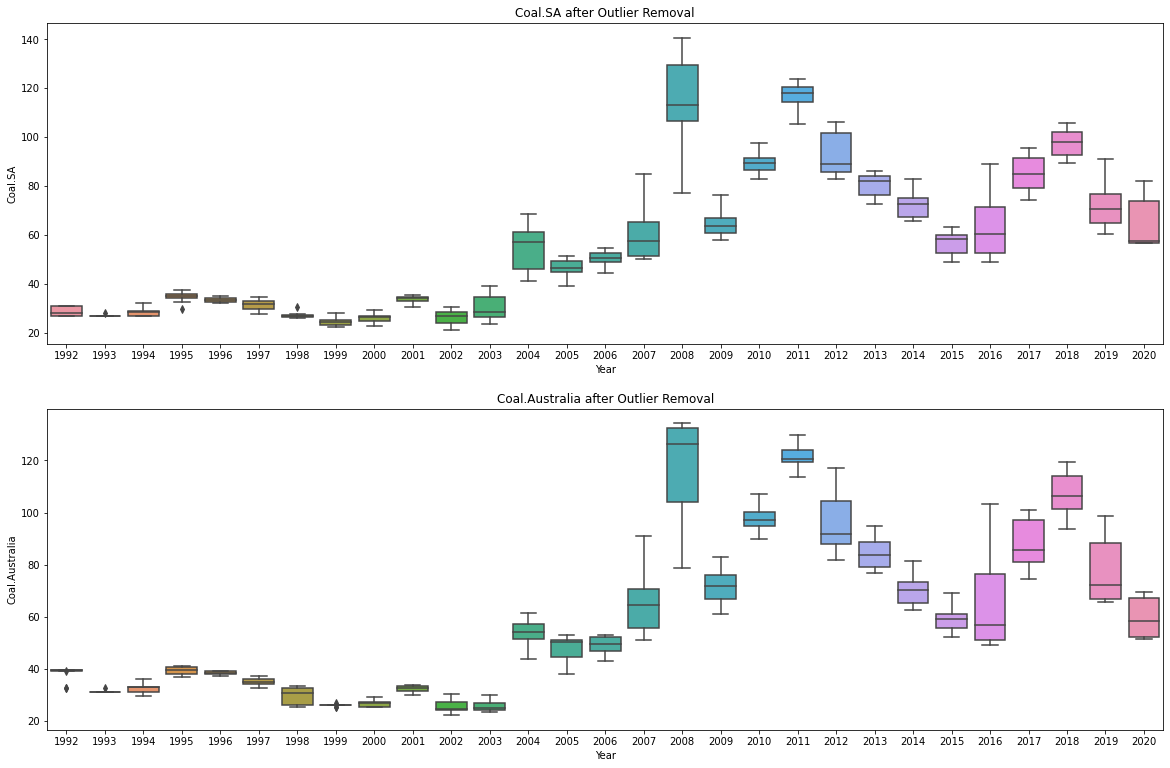

In [57]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Coal.SA',ax=ax3[0]).set_title("Coal.SA after Outlier Removal")
sns.boxplot(data=df, x='Year', y='Coal.Australia',ax=ax3[1]).set_title("Coal.Australia after Outlier Removal")

In [58]:
#For Fuel.Index
years = [1993,1998,1997,2002,2003,2012,2010,2014]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Fuel.Index",year,"Year")
            if(df['Fuel.Index'][ind] > Upper_Whisker):
                df.replace(df['Fuel.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Fuel.Index'][ind] < Lower_Whisker):
                df.replace(df['Fuel.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 


In [59]:
#For Coal Producer Index
years = [1995,2001,1997,2005,2007,2008,2009,2013,2017,2019,2020]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.Producer.Index",year,"Year")
            if(df['Coal.Producer.Index'][ind] > Upper_Whisker):
                df.replace(df['Coal.Producer.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.Producer.Index'][ind] < Lower_Whisker):
                df.replace(df['Coal.Producer.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Coal.Producer.Index after Outlier Removal')

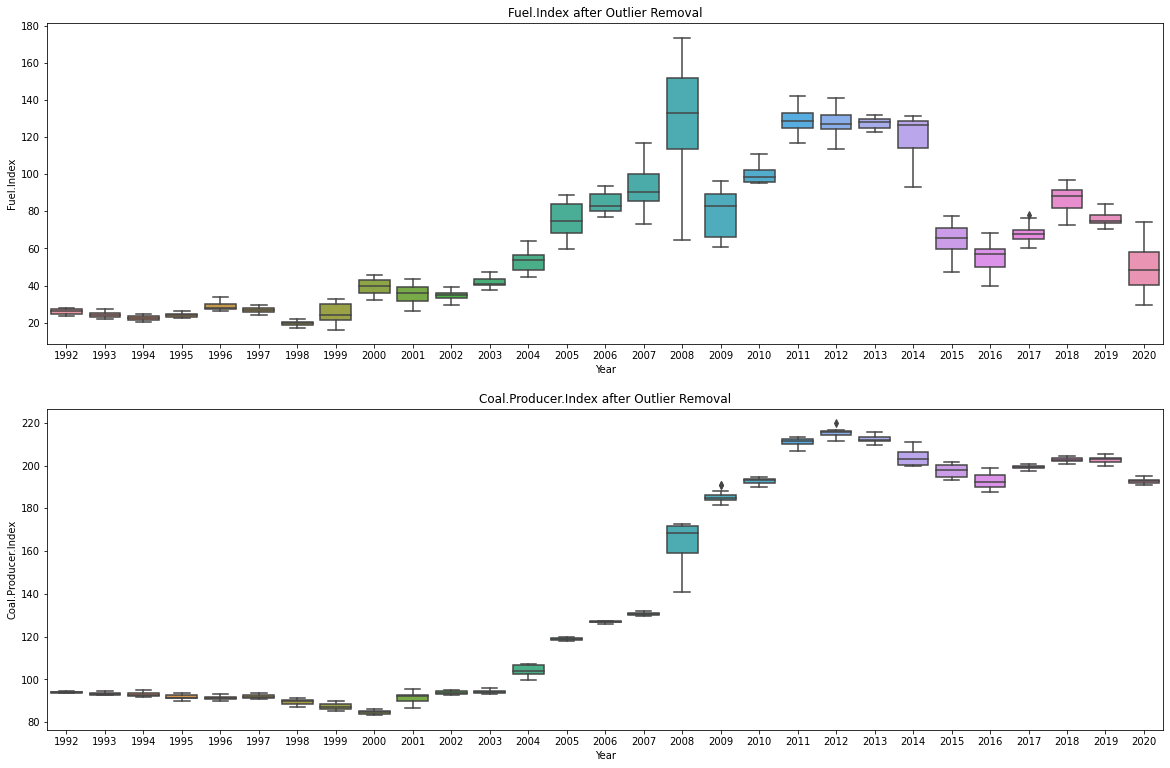

In [60]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Fuel.Index',ax=ax3[0]).set_title("Fuel.Index after Outlier Removal")
sns.boxplot(data=df, x='Year', y='Coal.Producer.Index',ax=ax3[1]).set_title("Coal.Producer.Index after Outlier Removal")

In [61]:
#For IronOre
years = [1998,2016,2013,2019]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("IronOre",year,"Year")
            if(df['IronOre'][ind] > Upper_Whisker):
                df.replace(df['IronOre'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['IronOre'][ind] < Lower_Whisker):
                df.replace(df['IronOre'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

In [62]:
#For Crude.Oil.Index
years = [1997,1998,2001,2002,2008,2010,2014,2016,2013,2019]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("CrudeOil.Index",year,"Year")
            if(df['CrudeOil.Index'][ind] > Upper_Whisker):
                df.replace(df['CrudeOil.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['CrudeOil.Index'][ind] < Lower_Whisker):
                df.replace(df['CrudeOil.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'CrudeOil.Index after Outlier Removal')

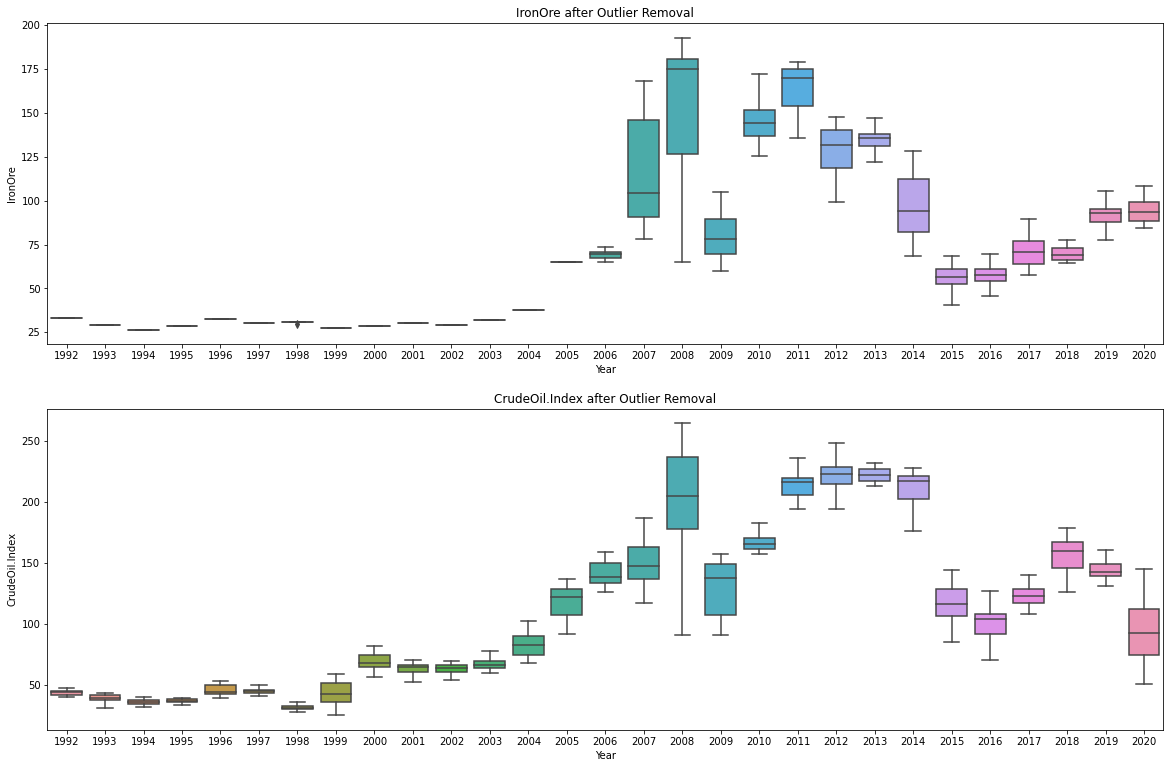

In [63]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='IronOre',ax=ax3[0]).set_title("IronOre after Outlier Removal")
sns.boxplot(data=df, x='Year', y='CrudeOil.Index',ax=ax3[1]).set_title("CrudeOil.Index after Outlier Removal")

In [64]:
#For Non-Fuel Index
years = [2003,2004,2005,2011]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("NonFuel.Index",year,"Year")
            if(df['NonFuel.Index'][ind] > Upper_Whisker):
                df.replace(df['NonFuel.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['NonFuel.Index'][ind] < Lower_Whisker):
                df.replace(df['NonFuel.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 


In [65]:
#For Commodity.Oil.Index
years = [1995,1996,2002,2013,2010,2014,2018]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Commodity.Index",year,"Year")
            if(df['Commodity.Index'][ind] > Upper_Whisker):
                df.replace(df['Commodity.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Commodity.Index'][ind] < Lower_Whisker):
                df.replace(df['Commodity.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Commodity.Index after Outlier Removal')

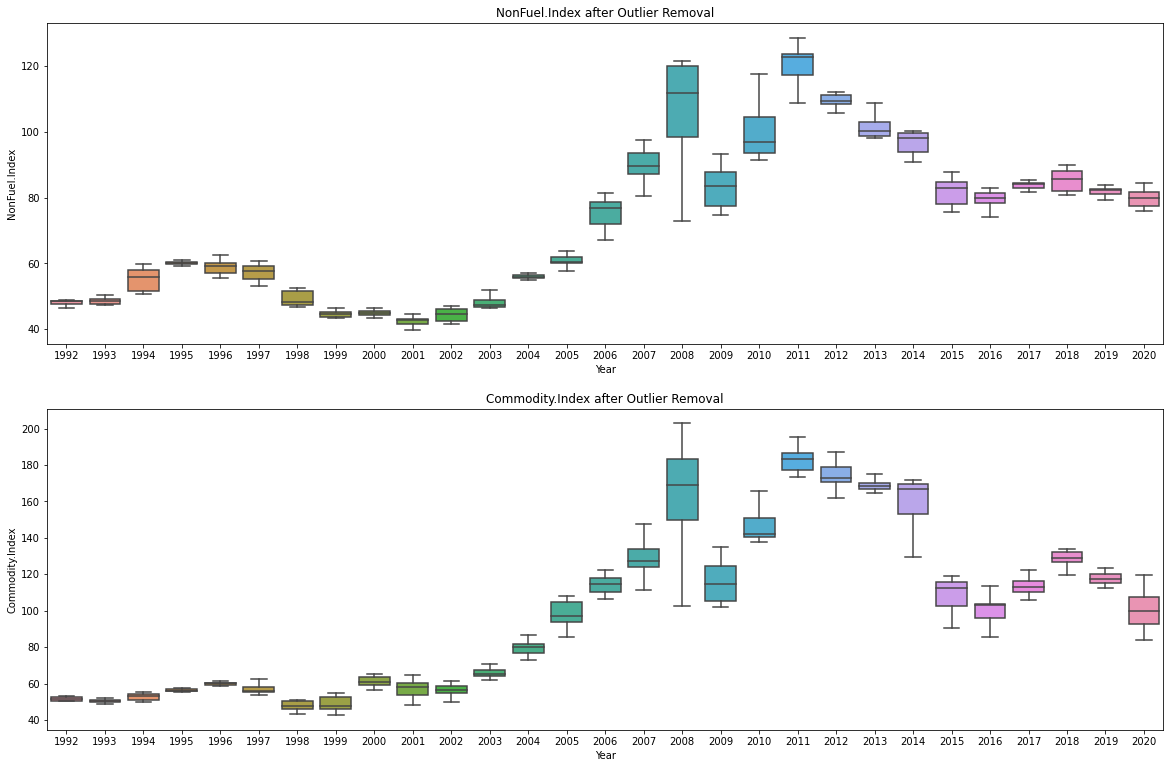

In [66]:
ffig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='NonFuel.Index',ax=ax3[0]).set_title("NonFuel.Index after Outlier Removal")
sns.boxplot(data=df, x='Year', y='Commodity.Index',ax=ax3[1]).set_title("Commodity.Index after Outlier Removal")

In [67]:
#For CCI
years = [1995,1999,2000,2004,2009,2014,2016,2018]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("CCI",year,"Year")
            if(df['CCI'][ind] > Upper_Whisker):
                df.replace(df['CCI'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['CCI'][ind] < Lower_Whisker):
                df.replace(df['CCI'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 


In [68]:
#For Metal Index
years = [2003,2004,2005,2013,2016,1997]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Metal.Index",year,"Year")
            if(df['Metal.Index'][ind] > Upper_Whisker):
                df.replace(df['Metal.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Metal.Index'][ind] < Lower_Whisker):
                df.replace(df['Metal.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

In [69]:
df=df.sort_index()

Text(0.5, 1.0, 'Metal.Index after Outlier Removal')

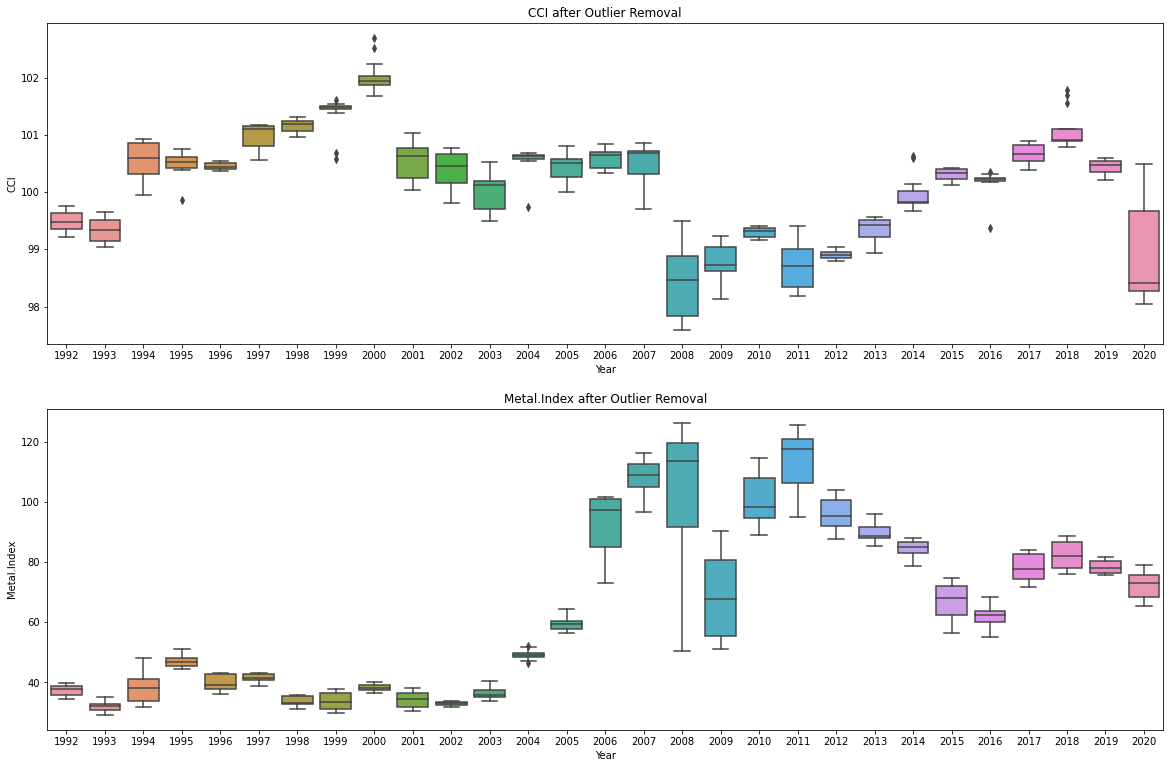

In [70]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year',ax=ax3[0],y='CCI').set_title("CCI after Outlier Removal")
sns.boxplot(data=df, x='Year',ax=ax3[1],y='Metal.Index').set_title("Metal.Index after Outlier Removal")

We handled outliers in years perspective as seen in the above graphs. We believe the main reason for the outliers is the economic crisis in 2008. There was a sharp slowdown in demand and the mining output remaining consistently high. Therefore, coal benchmarks fell down.

## Stationarity 

As mentioned in the trend section, we need to further check stationarity using these methods:

ADF plot: If most of the (95%) autocorrelation values are within the confidence interval, we can conclude that the series is stationary.

Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value (0.05), we can say that time series is stationary.

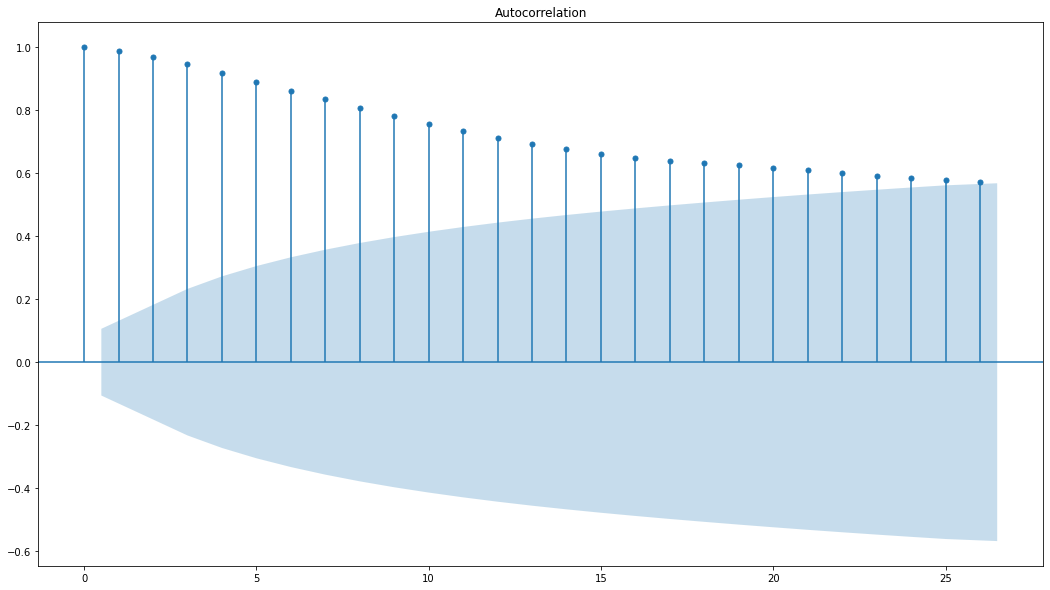

In [71]:
plot_acf(df["Coal.SA"]);

Looking at the ACF plot, we can conclude that the Coal.SA series is non-stationary since none of the lags are within the confidence interval.

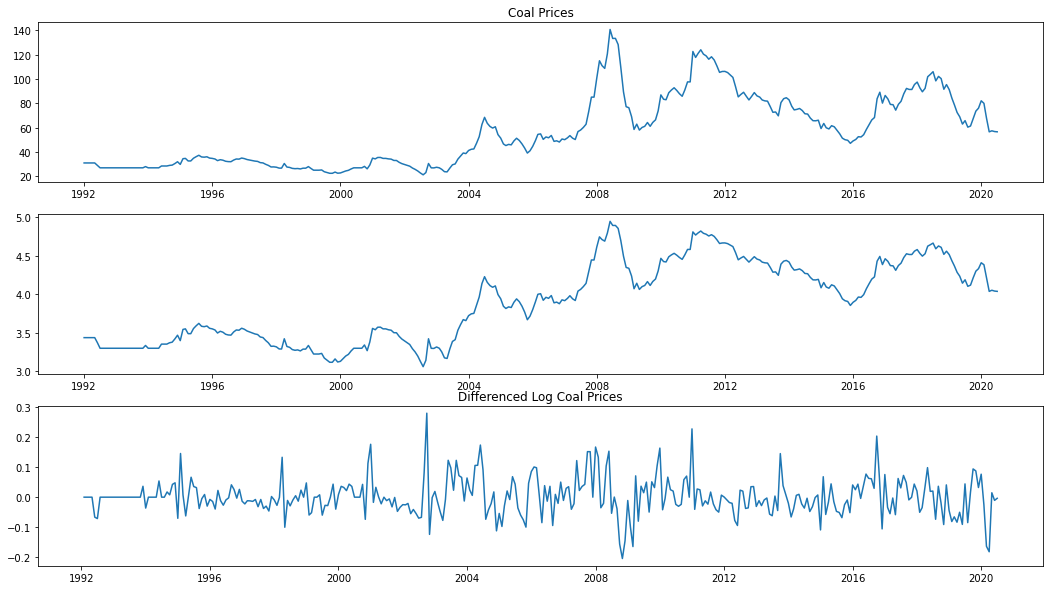

In [72]:
fig, ax = plt.subplots(3);
ax[0].plot(df["Coal.SA"]);
ax[0].set_title("Coal Prices")
ax[1].plot(np.log(df["Coal.SA"]))
ax[2].plot(df["Coal.SA"].apply(lambda x: np.log(x)).diff(periods=1));
ax[2].set_title("Differenced Log Coal Prices");

Looking at the time plots, the differenced series look a lot more stationary than the original series. We need to further inspect using ADF method as mentioned above.

In [73]:
from statsmodels.tsa.stattools import adfuller
# check for stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [74]:
adf_test(df["Coal.SA"],title='')

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.820749
p-value                   0.370210
# lags used              13.000000
# observations          329.000000
critical value (1%)      -3.450384
critical value (5%)      -2.870365
critical value (10%)     -2.571472
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [75]:
adf_test(df["Coal.SA"].apply(lambda x: np.log(x)).diff(periods=1), title='')   

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.133588e+00
p-value                 1.073929e-12
# lags used             2.000000e+00
# observations          3.390000e+02
critical value (1%)    -3.449788e+00
critical value (5%)    -2.870104e+00
critical value (10%)   -2.571332e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In order to make the series stationary, we are using differencing to trend effects from the original series.

# ARIMA

(p,d,q) is parameters of ARIMA model.

In order to choose p,d,q parameters we will use two different plots.

1) Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series.

2) Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons.



In [76]:
# computing the Differenced Log values to be used for plotting ACF and PACF
ts=df["Coal.SA"].apply(lambda x: np.log(x)).diff(periods=1).dropna()

Now after the EDA part is done, we are only interested in certain attributes which have high correlation with the "Coal.SA". We discard away the rest of the features.

In [77]:
final_features = df[['Coal.Australia','Coal.SA','Fuel.Index', 'Coal.Producer.Index',
       'IronOre', 'CrudeOil.Index', 'Metal.Index', 'NonFuel.Index',
       'Commodity.Index', 'CCI']]

**ACF-PACF Plots**

Text(0.5, 0.98, 'ACF and PCF plots for Differenced Log Time series')

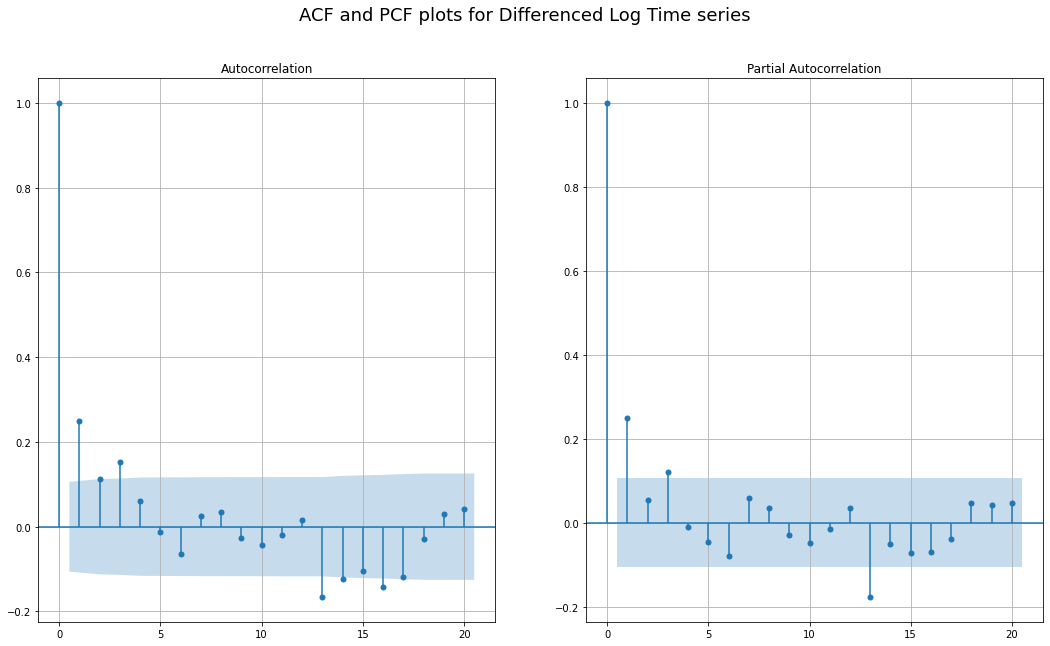

In [78]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True ## Set true for getting grid lines
fig, ax = plt.subplots(1,2)
plot_acf(ts, lags=20, ax=ax[0]);
plot_pacf(ts, lags=20, ax=ax[1]);
plt.suptitle ('ACF and PCF plots for Differenced Log Time series', fontsize=18)

Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values

The data may follow an ARIMA(p,d,0) model if the ACF and PACF plots of the differenced data show the following patterns:

    the ACF is exponentially decaying or sinusoidal;
    
    there is a significant spike at lag  p in the PACF, but none beyond lag p.

The data may follow an ARIMA(0, d, q) model if the ACF and PACF plots of the differenced data show the following patterns:

    the PACF is exponentially decaying or sinusoidal;
    
    there is a significant spike at lag  q in the ACF, but none beyond lag q.

Looking at the PACF plot, we can say that there is a significant spike at lag 1 and none beyond lag 1, therefore ARIMA(1,0,0) is a strong candidate. Of course, when we use the original series (not differenced), we need to use ARIMA(1,1,0) to account for differencing.

In [82]:
# Saving cleaned csv file
df.to_csv("cleaned_coal-25082020.csv")